# Cab Price Prediction using Regression
**Exercises**  
_R. Dissa | May 9, 2023_`

# I. Introduction

**Objektif:**

Proyek ini merupakan analisis serta prediksi untuk perusahaan kompetitor berbasis transportasi. Tujuan dari proyek ini adalah untuk mengembangkan model prediksi dari data transportasi berbasis aplikasi yakni Uber dan Lyft; untuk memprediksi harga tarif berdasarkan atribut yang diberikan. Atribut atau fitur tersebut diantara lain; tipe kendaraan, jarak, lokasi penjemputan, lokasi tujuan, kenaikan harga, serta waktu, dimana data merupakan data yang diambil dari kota Boston, Massachusetts pada tahun 2018.

**Problem Statement:**

Industri transportasi berbasis aplikasi telah berkembang pesat dalam dekade terakhir. Diperlukannya strategi untuk dapat mengoptimalkan harga agar tetap kompetitif di pasar. Uber dan Lyft memiliki model penetapan harga yang berbeda yang diasumsikan berdasarkan cab, *rush hour*, jarak, dan sebagainya. Diperlukan model *machine learning* untuk memprediksi harga tarif dengan akurasi yang tinggi. Prediksi harga tarif sangat penting untuk mengoptimalkan strategi penetapan harga, meningkatkan pendapatan, serta meningkatkan kepuasan pelanggan.

Dataset yang akan digunakan mencakup atribut sebagai berikut:

* distance: the distance between pickup and drop-off locations in miles.
* cab_type: the type of cab (Uber or Lyft).
* name: Name of the product used in the ride             
* surge_multiplier: Surge multiplier for the ride    
* destination: the drop-off location.
* source: the pickup location.
* price: the fare price for the ride.

Dataset ini memiliki 693.071 baris data. Data diambil dari tanggal 26 November 2018 hingga 18 Desember 2018, atau memiliki kisaran kurang lebih tiga minggu. Tujuan kami adalah untuk mengembangkan model yang dapat memprediksi harga tarif dengan akurasi tinggi berdasarkan atribut lain yang tersedia dalam dataset. Akurasi model akan dievaluasi menggunakan metrik evaluasi yang tepat, seperti Root *Mean Square Error* (RMSE), Mean *Absolute Error* (MAE), atau *R-squared (R2) score*.

Sementara deskripsi kolom pada dataset yang **belum** difilter adalah sebagai berikut:

| Column              | Description                                      |
|---------------------|--------------------------------------------------|
| id                  | Unique identifier for each column                |
| timestamp           | Unix timestamp of the ride start time            |
| hour                | Hour of the day when the ride started            |
| day                 | Day of the week when the ride started            |
| month               | Month of the year when the ride started          |
| datetime            | Date value of the ride start time                 |
| timezone            | Timezone of the ride start location              |
| source              | Initial source location of the ride              |
| destination         | Destination location of the ride                  |
| cab_type            | The type of cab used for the ride                  |
| product_id          | Unique identifier for the product used in the ride|
| name                | Name of the product used in the ride              |
| price               | Price of the ride                                 |
| distance            | Total distance of the requested ride              |
| surge_multiplier    | Surge multiplier for the ride                      |
| latitude            | Latitude of the ride start location                |
| longitude           | Longitude of the ride start location               |
| temperature         | Temperature at the ride start location             |
| apparentTemperature | Apparent temperature at the ride start location    |
| short_summary       | Short summary of the weather at the ride start location|
| long_summary        | Long summary of the weather at the ride start location |
| precipIntensity     | Precipitation intensity at the ride start location  |
| precipProbability   | Precipitation probability at the ride start location|
| humidity            | Humidity at the ride start location                 |
| windSpeed           | Wind speed at the ride start location                |
| windGust            | Wind gust at the ride start location                 |
| windGustTime        | Time of wind gust at the ride start location          |
| visibility          | Visibility at the ride start location                |
| temperatureHigh     | Highest temperature on the day of the ride start     |
| temperatureHighTime | Time of highest temperature on the day of the ride start|
| temperatureLow      | Lowest temperature on the day of the ride start      |
| temperatureLowTime  | Time of lowest temperature on the day of the ride start |
| apparentTemperatureHigh | Highest apparent temperature on the day of the ride start|
| apparentTemperatureHighTime | Time of highest apparent temperature on the day of the ride start|
| apparentTemperatureLow  | Lowest apparent temperature on the day of the ride start |
| apparentTemperatureLowTime | Time of lowest apparent temperature on the day of the ride start |
| icon                | Weather icon at the ride start location             |
| dewPoint            | Dew point at the ride start location                 |
| pressure            | Pressure at the ride start location                  |
| windBearing         | Wind bearing at the ride start location              |
| cloudCover          | Cloud cover at the ride start location                |
| uvIndex             | UV index at the ride start location                   |
| visibility.1        | Visibility at the ride start location (duplicate column)|
| ozone               | Ozone at the ride start location                      |
| sunriseTime         | Time of sunrise at the ride start location            |
| sunsetTime          | Time of sunset at the ride start location             |
| moonPhase           | Moon phase at the ride start location                  |
| precipIntensityMax  | Maximum precipitation intensity on the day of the ride start|
| uvIndexTime         | Time of UV index at the ride start location              |
| temperatureMin      | Lowest temperature on the day of the ride start           |
| temperatureMinTime  | Time of lowest temperature on the day of the ride start    |

# II. Import Libraries
Berisi library yang akan digunakan dalam project.

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# untuk feature engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder               # preprocessing
from sklearn.feature_selection import SelectKBest, f_regression              # selection
from statsmodels.stats.outliers_influence import variance_inflation_factor

# untuk model
from sklearn.linear_model import LinearRegression

# untuk evaluasi
from sklearn.metrics import mean_absolute_error, mean_squared_error

# simpan model
import pickle, joblib
import json

# III. Data Preparation
Bagian ini berisikan data loading serta pengecekan mengenai banyak data, isi data, ukuran data, dan sebagainya untuk mengetahui bagian apa yang berpotensi untuk diamati lebih lanjut.

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
# connect dengan kaggle API
!cp '/content/kaggle.json' ~/.kaggle
!ls ~/.kaggle

kaggle.json


In [4]:
# melakukan download kaggle dari website
! kaggle datasets download -d brllrb/uber-and-lyft-dataset-boston-ma

 99% 44.0M/44.5M [00:02<00:00, 23.7MB/s]
100% 44.5M/44.5M [00:02<00:00, 16.1MB/s]


In [5]:
# unzipped data kemudian save ke folder dataset
!unzip -q /content/uber-and-lyft-dataset-boston-ma.zip -d dataset 

In [6]:
# loading data
df= pd.read_csv('/content/dataset/rideshare_kaggle.csv')
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [7]:
# melihat informasi general data; tipe data serta jumlah data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [8]:
# melihat jumlah baris dan kolom data
df.shape

(693071, 57)

In [9]:
# melihat tanggal pertama pengambilan data
df['datetime'].min()

'2018-11-26 03:40:46'

In [10]:
# melihat tanggal terakhir pengambilan data
df['datetime'].max()

'2018-12-18 19:15:10'

Data ini ini memiliki 693071 baris serta 57 kolom. Data ini juga memiliki kisaran waktu pengambilan data dari tanggal 26 November 2018 hingga 18 Desember 2018. 

#IV. EDA
Berisi eksplorasi data pada dataset yang akan dilakukan pembuatan query, grouping, serta visualisasi data. Bagian ini akan menekankan deskripsi serta keterhubungan data secara prinsip.

- Melihat deskripsi data (tendensi sentral, maksimal, minimum, dan sebagainya)
- Melihat persebaran data pada dataset berbasis numerikal
- Meliihat perbedaan persebaran data pada 'cab_type' atau pada name (jenis cab) yang berbeda.
- Melakukan filtering pertama pada dataset dengan melihat korelasi feature dengan target maupun dengan pengamatan pribadi.
- Menentukan model yang akan dipakai melihat dari pola korelasi fitur dan target.


In [11]:
# melihat apakah ada data terduplikasi
# bila tidak ada, tidak dilakukan proses apapun

df.duplicated().sum()

0

<ipython-input-12-0bc7eb1baf9b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


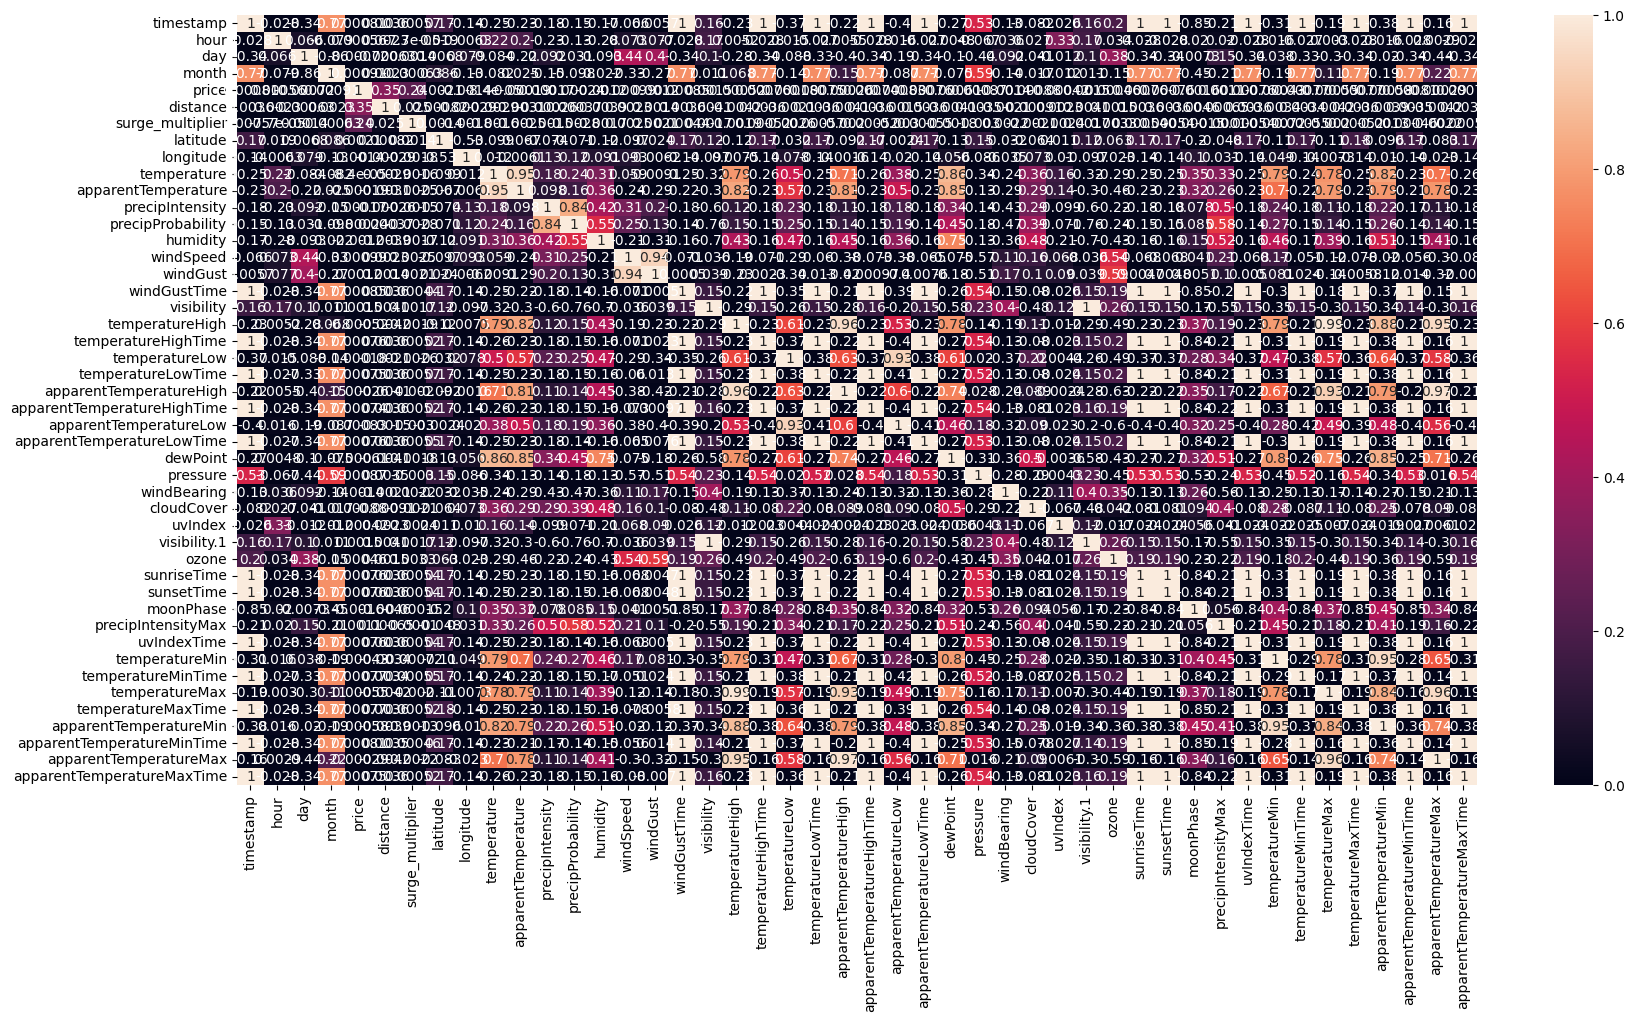

In [12]:
# melihat korelasi pada keseluruhan data
corr = df.corr()

plt.figure(figsize=(20,10))
sns.heatmap(corr, annot= True, vmin=0, vmax=1)
plt.show()

Ada beberapa kolom numerikal yang terlihat memiliki korelasi tinggi, yang berarti bahwa lebih baik dipilih hanya salah satu atau perwakilan dari data-data tersebut. Selain itu, berdasarkan pendapat pribadi, kami juga merasa diperlukannya untuk melakukan filtering pada data-data yang memang dianggap belum menjadi fokusan proyek kali ini. Data-data yang ingin dilepaskan serta alasannya adalah:

- id: Terlalu banyak dan hanya bekerja sebagai penamaan data dengan value unik
- product_id: Sudah diwakilkan oleh kolom 'name'
- timezone, timestamp: 'timezone' hanya memiliki 1 unique values, sementara 'timestamp' sudah diwakilkan oleh kolom lainnya
- longitude, langitude: sudah diwakilkan oleh 'source' dan 'destination'
- ozon, precipitation, etc: dianggap sudah diwakilkan oleh 'short_summary' dan 'temperature'


In [13]:
# menyeleksi data yang dianggap relevan berdasarkan corr() serta pendapat pribadi
selected_col = ['hour', 'day', 'month', 'datetime', 'source', 'destination', 'cab_type', 'name', 'distance', 'surge_multiplier', 'short_summary', 'temperature', 'price']

# membuat dataframe baru
df_selected = df.loc[:, selected_col]
df_selected.head(3)

,hour,day,month,datetime,source,destination,cab_type,name,distance,surge_multiplier,short_summary,temperature,price
0,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,0.44,1.0,Mostly Cloudy,42.34,5.0
1,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,0.44,1.0,Rain,43.58,11.0
2,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,0.44,1.0,Clear,38.33,7.0


Data sudah tersaring berdasarkan penyaringan pertama.

## Descriptive

In [14]:
# membuat query baru yang memiliki kolom harga yang telah dibagi per distance
df_price = df_selected.copy()
df_price['price_per_distance'] = df_selected['price'] / df_selected['distance']

In [15]:
# mengecek kembali informasi pada data yang sudah melakukan filtering pertama
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   hour                693071 non-null  int64  
 1   day                 693071 non-null  int64  
 2   month               693071 non-null  int64  
 3   datetime            693071 non-null  object 
 4   source              693071 non-null  object 
 5   destination         693071 non-null  object 
 6   cab_type            693071 non-null  object 
 7   name                693071 non-null  object 
 8   distance            693071 non-null  float64
 9   surge_multiplier    693071 non-null  float64
 10  short_summary       693071 non-null  object 
 11  temperature         693071 non-null  float64
 12  price               637976 non-null  float64
 13  price_per_distance  637976 non-null  float64
dtypes: float64(5), int64(3), object(6)
memory usage: 74.0+ MB


In [16]:
# mengelompokkan data berdasarkan kolom objek/ kategori, kemudian melihat deskripsi data
cat_cols = list(df_price.select_dtypes(include='object'))
df_price[cat_cols].describe()

,datetime,source,destination,cab_type,name,short_summary
count,693071,693071,693071,693071,693071,693071
unique,31350,12,12,2,13,9
top,2018-11-26 23:21:14,Financial District,Financial District,Uber,UberXL,Overcast
freq,156,58857,58851,385663,55096,218895


Didapati bahwa; kolom 'source' (asal)  memiliki modus Financial District, kolom 'destination' (tujuan) memiliki modus Financial District, kolom 'cab_type' (perbedaan aplikasi) memiliki tipe modus Uber, kolom 'name' (variasi cab pada tiap aplikasi) memiliki modus UberXL, sedangkan 'short_summary' (cuaca) yang paling sering muncul adalah *Overcast* atau mendung. 

In [17]:
# mengelompokkan data berdasarkan kolom number, kemudian melihat deskripsi data
num_cols = list(df_price.select_dtypes(include=np.number))
df_price[num_cols].describe()

,hour,day,month,distance,surge_multiplier,temperature,price,price_per_distance
count,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,637976.000000,637976.000000
mean,11.619137,17.794365,11.586684,2.189430,1.013870,39.584388,16.545125,9.687674
std,6.948114,9.982286,0.492429,1.138937,0.091641,6.726084,9.324359,13.705589
min,0.000000,1.000000,11.000000,0.020000,1.000000,18.910000,2.500000,0.556586
25%,6.000000,13.000000,11.000000,1.280000,1.000000,36.450000,9.000000,4.661017
50%,12.000000,17.000000,12.000000,2.160000,1.000000,40.490000,13.500000,7.492326
75%,18.000000,28.000000,12.000000,2.920000,1.000000,43.580000,22.500000,11.538462
max,23.000000,30.000000,12.000000,7.860000,3.000000,57.220000,97.500000,1375.000000


Didapati bahwa kolom numerikal memiliki deskripsi seperti tertera, namun ada beberapa hal yang ingin kami highlight yakni: jarak tempuh berkisar dari 0.02 hingga 7.86 (kami asumsikan dalam satuan mil), 'surge_multiplier' atau kenaikan harga berkisar dari angka 1.0 hingga 3.0, serta harga berkisar dari 2.5 USD hingga 97.5 USD.

## Cab Type Description

Melihat deskripsi data yang telah tibagi berdasarkan 'cab_type'

Deskripsi data dengan tipe cab Lyft.

In [18]:
# membuat query yang hanya berisikan data lyft
lyft = df_selected['cab_type']=='Lyft'
lyft_df = df_selected[lyft]

In [19]:
# melihat deskripsi data berbasis number untuk cab_type lyft
num_cols_lyft = list(lyft_df.select_dtypes(include=np.number))
lyft_df[num_cols_lyft].describe()

,hour,day,month,distance,surge_multiplier,temperature,price
count,307408.000000,307408.000000,307408.000000,307408.000000,307408.00000,307408.000000,307408.000000
mean,11.628920,17.773477,11.587112,2.186976,1.03127,39.596384,17.351396
std,6.955654,9.991441,0.492354,1.086622,0.13561,6.730425,10.019171
min,0.000000,1.000000,11.000000,0.390000,1.00000,18.910000,2.500000
25%,6.000000,13.000000,11.000000,1.270000,1.00000,36.450000,9.000000
50%,12.000000,17.000000,12.000000,2.140000,1.00000,40.490000,16.500000
75%,18.000000,28.000000,12.000000,2.970000,1.00000,43.580000,22.500000
max,23.000000,30.000000,12.000000,6.330000,3.00000,57.220000,97.500000


In [20]:
# melihat deskripsi data berbasis object untuk cab_type lyft
cat_cols_lyft = list(lyft_df.select_dtypes(include='object'))
lyft_df[cat_cols_lyft].describe()

,datetime,source,destination,cab_type,name,short_summary
count,307408,307408,307408,307408,307408,307408
unique,29299,12,12,1,6,9
top,2018-11-26 23:33:14,Financial District,Financial District,Lyft,Lux,Overcast
freq,111,26237,26238,307408,51235,97416


Deskripsi data dengan tipe cab Uber.

In [21]:
# membuat query yang hanya berisikan data uber
uber = df_selected['cab_type']=='Uber'
uber_df = df_selected[uber]

In [22]:
# melihat deskripsi data berbasis number untuk cab_type uber
num_cols_uber = list(uber_df.select_dtypes(include=np.number))
uber_df[num_cols_uber].describe()

,hour,day,month,distance,surge_multiplier,temperature,price
count,385663.000000,385663.000000,385663.000000,385663.000000,385663.0,385663.000000,330568.000000
mean,11.611339,17.811014,11.586344,2.191386,1.0,39.574827,15.795343
std,6.942097,9.974964,0.492489,1.178973,0.0,6.722616,8.560300
min,0.000000,1.000000,11.000000,0.020000,1.0,18.910000,4.500000
25%,6.000000,13.000000,11.000000,1.300000,1.0,36.500000,9.000000
50%,12.000000,17.000000,12.000000,2.170000,1.0,40.490000,12.500000
75%,18.000000,28.000000,12.000000,2.840000,1.0,43.580000,21.500000
max,23.000000,30.000000,12.000000,7.860000,1.0,57.220000,89.500000


In [23]:
# melihat deskripsi data berbasis object untuk cab_type uber
cat_cols_uber = list(uber_df.select_dtypes(include='object'))
uber_df[cat_cols_uber].describe()

,datetime,source,destination,cab_type,name,short_summary
count,385663,385663,385663,385663,385663,385663
unique,30346,12,12,1,7,9
top,2018-11-28 19:17:08,Financial District,Financial District,Uber,UberXL,Overcast
freq,110,32620,32613,385663,55096,121479


Deskripsi data yang telah dibagi berdasarkan 'cab_type' ternyata tidak berbeda jauh dengan data keseluruhan. Perbedaan paling terlihat ada pada perbedaan modus dari kolom 'name', yakni Lux untuk cab Lyft, serta UberXL untuk cab Uber. Selain itu, tipe cab Lyft memiliki rata-rata serta nilai maksimal harga yang lebih tinggi dibandingkan Uber.  

### Rush Hour
Bagian ini akan mengecek tren waktu untuk menganalisis fitur dan hal menarik dari data.

Text(0, 0.5, 'Total Ride')

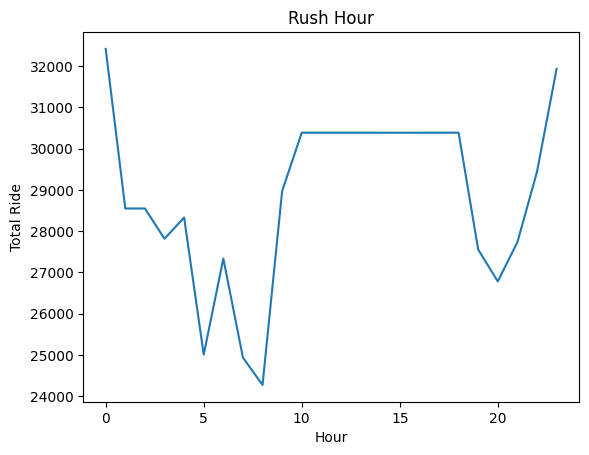

In [24]:
# Melihat frekuensi ride tiap jam
hourly = df_selected.groupby(['hour']).size().reset_index(name='total_ride')
hourly['total_ride'].plot()
plt.title('Rush Hour')
plt.xlabel('Hour')
plt.ylabel('Total Ride')

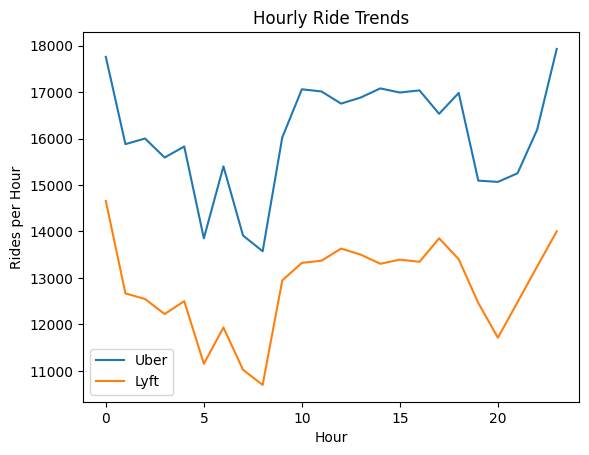

In [25]:
# Melihat frekuensi ride tiap jam pada tiap cab_type
uber_hourly = df_selected[df_selected['cab_type']=='Uber'].groupby(['hour']).size().reset_index(name='uber_total')
lyft_hourly = df_selected[df_selected['cab_type']=='Lyft'].groupby(['hour']).size().reset_index(name='lyft_total')

plt.plot(uber_hourly['hour'], uber_hourly['uber_total'], label='Uber')
plt.plot(lyft_hourly['hour'], lyft_hourly['lyft_total'], label='Lyft')

plt.xlabel('Hour')
plt.ylabel('Rides per Hour')
plt.title('Hourly Ride Trends')
plt.legend()
plt.show()

Visualisasi menunjukkan adanya frekuensi ride/ tumpangan yang tinggi sekitar jam 00.00. Selain itu, adanya kenaikan frekuensi tumpangan sekitar jam 09.00-18.00. Penyebaran ini diasumsikan mungkin karena pada waktu lainnya penduduk Boston cenderung menggunakan kendaraan pribadi ataupun transportasi umum lainnya (selain cab). Dapat dilihat juga bahwa pengguna Uber berdasarkan frekuensi per jamnya lebih banyak dibandingkan pengguna Lyft (mendukung argumentasi pada deskripsi keseluruhan data mengenai modus 'cab_type'). Setelah itu, mengenai bentuk distribusi data untuk tipe Uber dan Lyft berbentuk mirip yang menandakan bahwa pola *rush hour* kurang lebih sama untuk kedua tipe cab.

## Missing Values
Bagian ini akan melakukan penanganan pada data yang hilang. 

Ditemukan bahwa variasi 'taxi' pada cab_type Uber memiliki data harga yang hilang. 




In [26]:
# memastikan lokasi data yang hilang
df_selected[df_selected['name'] == 'Taxi'].isnull().sum()

hour                    0
day                     0
month                   0
datetime                0
source                  0
destination             0
cab_type                0
name                    0
distance                0
surge_multiplier        0
short_summary           0
temperature             0
price               55095
dtype: int64

In [27]:
# melihat persentase data yang hilang
missing_percentage = df_selected.isnull().mean() * 100
missing_percentage

hour                0.000000
day                 0.000000
month               0.000000
datetime            0.000000
source              0.000000
destination         0.000000
cab_type            0.000000
name                0.000000
distance            0.000000
surge_multiplier    0.000000
short_summary       0.000000
temperature         0.000000
price               7.949402
dtype: float64

Setelah memastikan lokasi data yang hilang, kami mengasumsikan bahwa data yang hilang adalah Missing Not At Random (MNAR). Hal ini dikarenakan data harga yang hilang hanya ada pada vasiasi 'taxi'. Hal ini dapat dikarenakan ada hilangnya data atau data belum diperbarui pada kolom tersebut. 



In [28]:
# menghapus baris yang hilang, memasukan pada variabel baru
df_drop = df_selected.copy()
df_drop = df_drop.dropna(axis=0)

In [29]:
# mengecek baris sudah terhapus
df_drop.shape

(637976, 13)

Missing data pada kolom price ada sebanyak 7.9% dari jumlah keseluruhan data. Walaupun berjumlah tidak 'sedikit' (>5%) tetapi saya tetap akan menghapus kolom karena anggapan bahwa data mentah sudah cukup banyak (672096 baris), serta karena data yang hilang merupakan data yang akan dijadikan **target**. Penghapusan dilakukan dan baris data kini tersisa 637976 baris. 

## Correlation with target
Bagian ini akan melihat korelasi fitur dan target yang akan dilaksanakan beserta dengna visualisasi data.

### Categorical


Text(0.5, 1.0, 'Histogram of Cab Type')

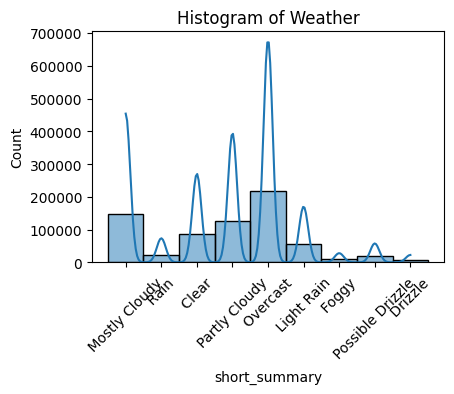

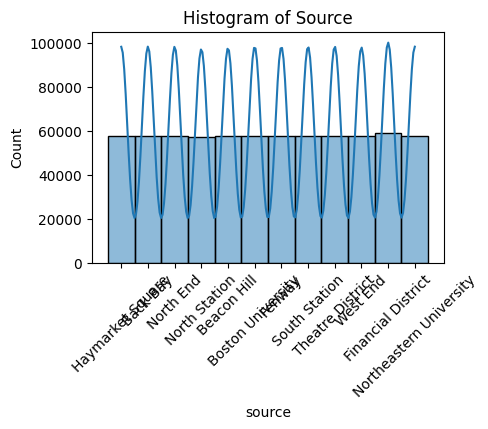

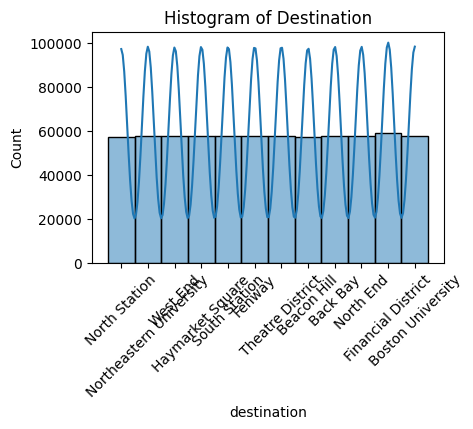

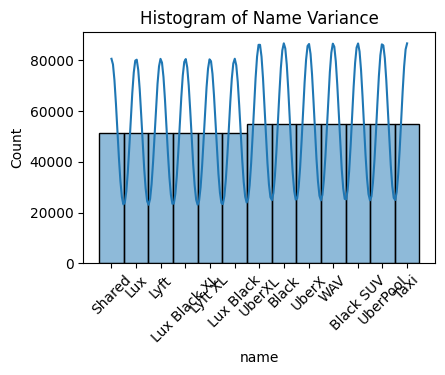

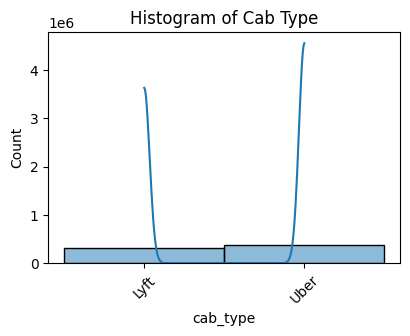

In [30]:
# Membuat Histogram penyebaran data objek/ category

plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
sns.histplot(df_selected['short_summary'], kde=True, bins=30)
plt.title('Histogram of Weather')
plt.xticks(rotation=45)


plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
sns.histplot(df_selected['source'], kde=True, bins=30)
plt.xticks(rotation=45)
plt.title('Histogram of Source')


plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
sns.histplot(df_selected['destination'], kde=True, bins=30)
plt.xticks(rotation=45)
plt.title('Histogram of Destination')


plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
sns.histplot(df_selected['name'], kde=True, bins=30)
plt.xticks(rotation=45)
plt.title('Histogram of Name Variance')

plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
sns.histplot(df_selected['cab_type'], kde=True, bins=30)
plt.xticks(rotation=45)
plt.title('Histogram of Cab Type')

In [31]:
# melihat perbedaan jumlah data cab_type Uber dan Lyft
df_selected['cab_type'].value_counts()

Uber    385663
Lyft    307408
Name: cab_type, dtype: int64

In [32]:
# membuat query baru yang memiliki kolom harga yang telah dibagi per distance
df_price = df_selected.copy()
df_price['price_per_distance'] = df_selected['price'] / df_selected['distance']

In [33]:
# melihat rata-rata harga sesuai nama variasi cab
df_selected.groupby(['cab_type','name'])[['price']].mean().round(2)

price
cab_type name               
Lyft     Lux           17.77
         Lux Black     23.06
         Lux Black XL  32.32
         Lyft           9.61
         Lyft XL       15.31
         Shared         6.03
Uber     Black         20.52
         Black SUV     30.29
         Taxi            NaN
         UberPool       8.75
         UberX          9.77
         UberXL        15.68
         WAV            9.77

Ada perbedaan harga yang signifikan dari variansi-variansi cab pada masing-masing perusahaan.

In [34]:
# melihat rata-rata harga per jarak sesuai nama variasi cab
df_price.groupby(['cab_type','name'])[['price_per_distance']].mean().round(2)

price_per_distance
cab_type name                            
Lyft     Lux                         9.60
         Lux Black                  12.76
         Lux Black XL               18.77
         Lyft                        5.37
         Lyft XL                     8.30
         Shared                      3.30
Uber     Black                      12.37
         Black SUV                  19.43
         Taxi                         NaN
         UberPool                    5.34
         UberX                       5.94
         UberXL                      9.13
         WAV                         5.94

Variasi tipe cab berpengaruh dalam kenaikan dan penurunan harga per jarak.

In [35]:
# melihat persentase tiap kondisi cuaca
weather = df_selected.groupby(['short_summary']).size().reset_index(name='total')
weather['percentage %'] = (((weather.total/df.shape[0]) * 100).round(2))
weather

,short_summary,total,percentage %
0,Clear,87126,12.57
1,Drizzle,7296,1.05
2,Foggy,9060,1.31
3,Light Rain,54912,7.92
4,Mostly Cloudy,146210,21.10
5,Overcast,218895,31.58
6,Partly Cloudy,127224,18.36
7,Possible Drizzle,18636,2.69
8,Rain,23712,3.42


In [36]:
# melihat rata-rata harga sesuai kondisi cuaca
df_selected.groupby(['cab_type','short_summary'])[['price']].mean().round(2)

price
cab_type short_summary            
Lyft      Clear              17.31
          Drizzle            17.35
          Foggy              17.51
          Light Rain         17.34
          Mostly Cloudy      17.41
          Overcast           17.32
          Partly Cloudy      17.38
          Possible Drizzle   17.24
          Rain               17.31
Uber      Clear              15.72
          Drizzle            15.77
          Foggy              15.64
          Light Rain         15.84
          Mostly Cloudy      15.84
          Overcast           15.80
          Partly Cloudy      15.77
          Possible Drizzle   15.81
          Rain               15.83

Tidak ada perbedaan yang signifikan pada kondisi cuaca tertentu. Justru lagi-lagi, perbedaan harga lebih ditekankan bergantung pada 'cab_type' yang digunakan.

### Numerical

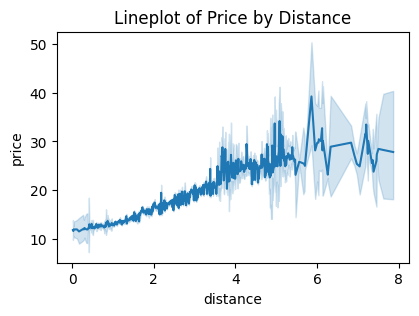

In [37]:
# visualisai line plot untuk harga dan jarak 
plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
sns.lineplot(x='distance', y='price', data=df_selected)
plt.title('Lineplot of Price by Distance')
plt.show()

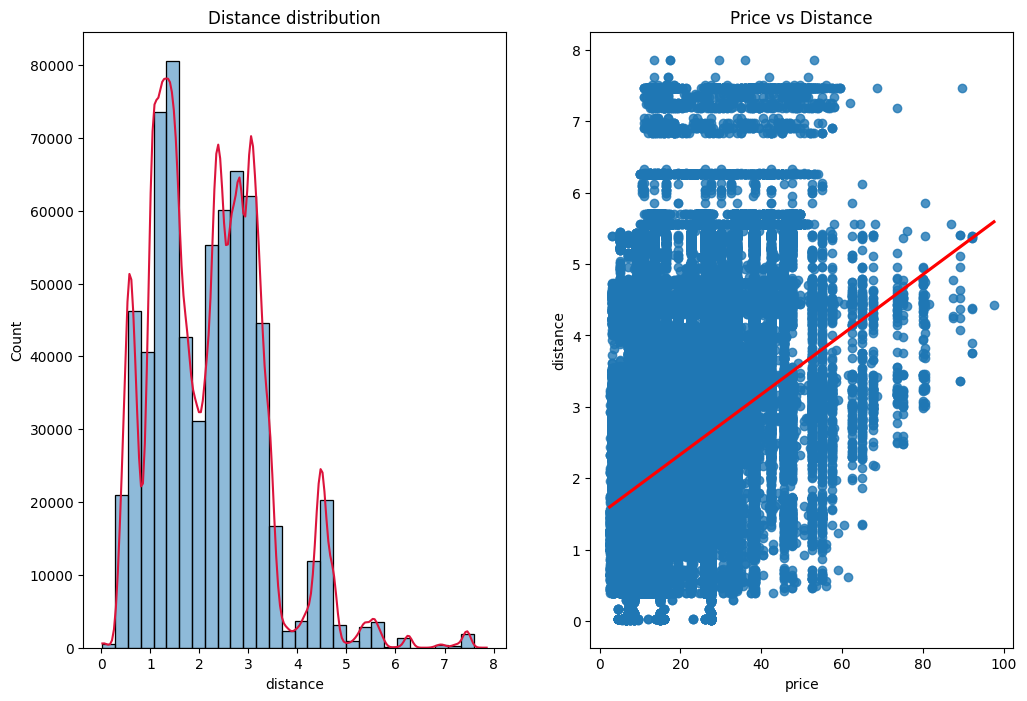

In [38]:
# melihat distribusi jarak serta hubungan harga dan jarak
fig, axes = plt.subplots(1,2, figsize=(12,8))
sns.histplot(ax=axes[0],data=df['distance'],kde=True, bins=30)
axes[0].set_title('Distance distribution')
axes[0].lines[0].set_color('crimson')
sns.regplot(ax=axes[1],x='price',y='distance', data=df, line_kws={"color": "red"})
axes[1].set_title('Price vs Distance')
plt.show()

Data distance terlihat memiliki korelasi linear.

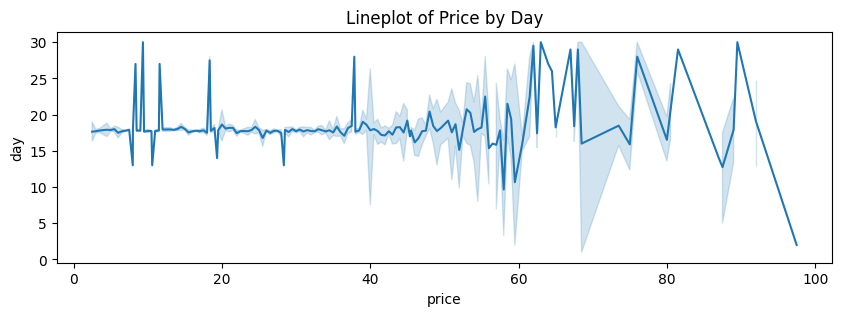

In [39]:
# visualisai line plot untuk harga per hari
plt.figure(figsize=(10,3))
sns.lineplot(x='price', y='day', data=df_selected)
plt.title('Lineplot of Price by Day')
plt.show()

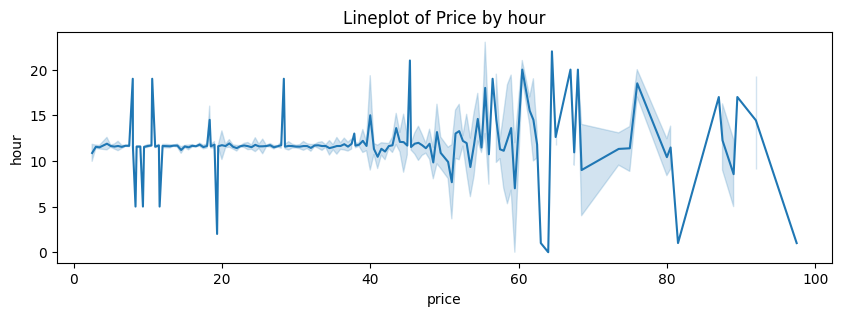

In [40]:
# visualisai line plot untuk harga pada jam yang berbeda
plt.figure(figsize=(10,3))
sns.lineplot(x='price', y='hour', data=df_selected)
plt.title('Lineplot of Price by hour')
plt.show()

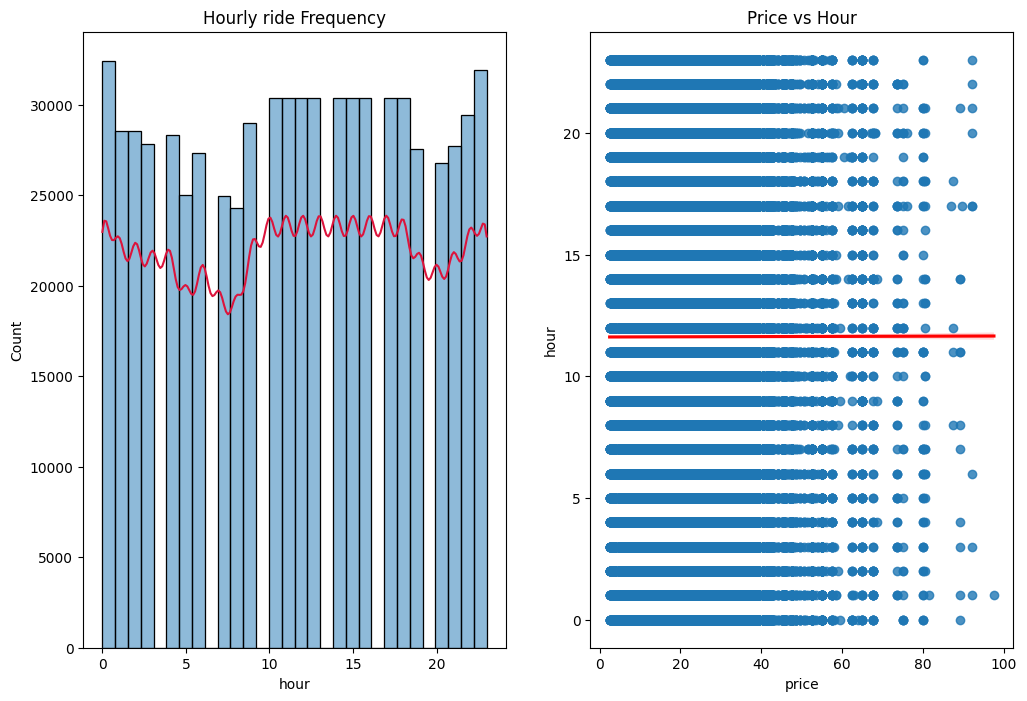

In [41]:
# melihat distribusi frekuensi ride tiap jam serta hubungan harga dan jam
fig, axes = plt.subplots(1,2, figsize=(12,8))
sns.histplot(ax=axes[0],data=df['hour'],kde=True, bins=30)
axes[0].set_title('Hourly ride Frequency')
axes[0].lines[0].set_color('crimson')
sns.regplot(ax=axes[1],x='price',y='hour', data=df, line_kws={"color": "red"})
axes[1].set_title('Price vs Hour')
plt.show()

Pada plot Price vs Hour, terlihat tidak ada kenaikan ataupun penurunan harga pada jam yang berbeda.

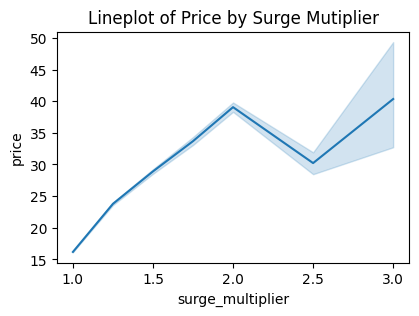

In [42]:
# visualisai line plot untuk harga dan kenaikan harga 
plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
sns.lineplot(x='surge_multiplier', y='price', data=df_selected)
plt.title('Lineplot of Price by Surge Mutiplier')
plt.show()

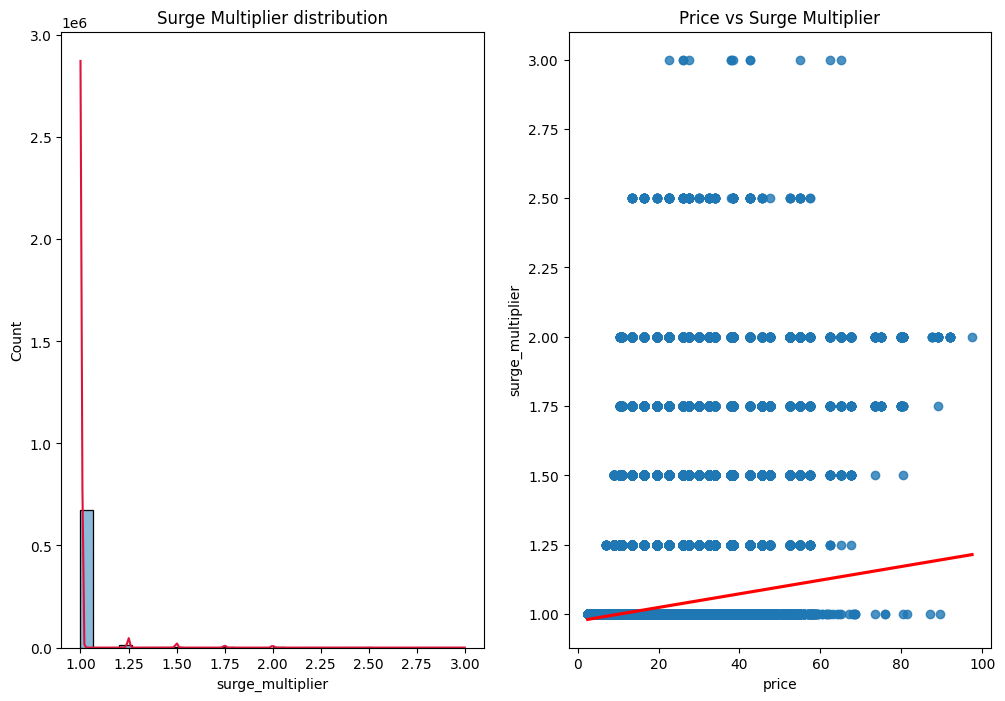

In [43]:
# melihat distribusi surge multiplier jam serta hubungannya dengan harga
fig, axes = plt.subplots(1,2, figsize=(12,8))
sns.histplot(ax=axes[0],data=df['surge_multiplier'],kde=True, bins=30)
axes[0].set_title('Surge Multiplier distribution')
axes[0].lines[0].set_color('crimson')
sns.regplot(ax=axes[1],x='price',y='surge_multiplier', data=df, line_kws={"color": "red"})
axes[1].set_title('Price vs Surge Multiplier')
plt.show()

Terlihat ada korelasi linear dimana pertambahan 'surge_multiplier' menandakan adanya pertambahan pada harga juga.

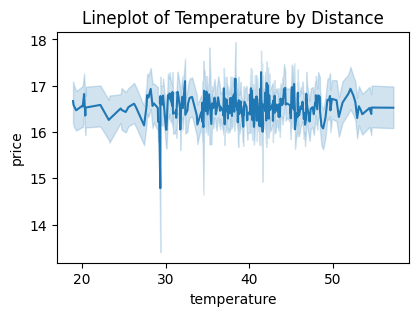

In [44]:
# melihat lineplot temperature dengan harga
plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
sns.lineplot(x='temperature', y='price', data=df_selected)
plt.title('Lineplot of Temperature by Distance')
plt.show()

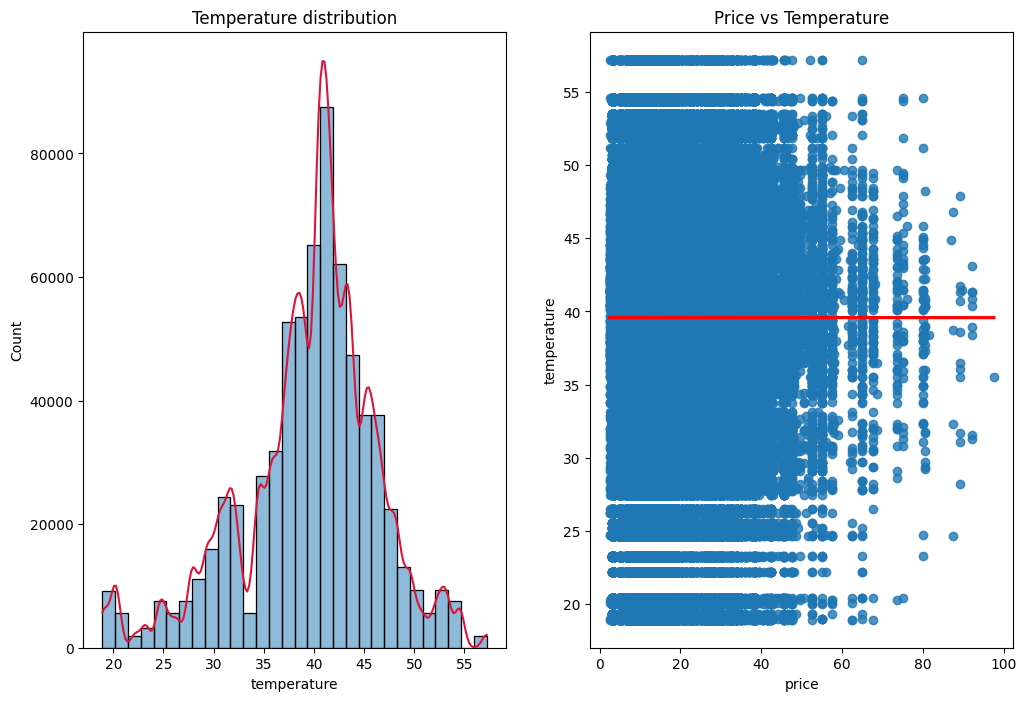

In [45]:
# melihat distribusi temperature serta hubungannya dengan harga
fig, axes = plt.subplots(1,2, figsize=(12,8))
sns.histplot(ax=axes[0],data=df['temperature'],kde=True, bins=30)
axes[0].set_title('Temperature distribution')
axes[0].lines[0].set_color('crimson')
sns.regplot(ax=axes[1],x='price',y='temperature', data=df, line_kws={"color": "red"})
axes[1].set_title('Price vs Temperature')
plt.show()

Pada plot Price vs Temperature, terlihat tidak ada kenaikan ataupun penurunan harga pada jam yang berbeda.

Secara kesimpulan, data numerikal yang memiliki korelasi terhadap 'price' adalah 'distance' dan 'surge_multiplier'. 

**Interests**

Kami memiliki ketertarikan pada kolom 'surge_multiplier'. *Surge multiplier* dapat diartikan kenaikan harga yang ditetapkan oleh tiap cab yang dapat diakibatkan oleh kondisi tertentu (seperti *rush hour*, dan sebagainya). Karena itu kami ingin melihat lebih lanjut mengenai frekuensi serta hubungan kolom 'surge_multiplier' dengan 'price'.

Catatan: Kami mengategorikan 'surge_multiplier' sebagai data **numerikal** dengan asumsi bahwa data tersebut merupakan data yang merepresentasikan kelipatan value yang bersifat kontinu. Namun, ada juga pertimbangan untuk menganggap bahwa kolom tersebut merupakan kolom kategori ordinal--hanya saja, untuk proyek kali ini kami akan memfokuskan dan menetapkan 'surge_multiplier' sebagai kolom berisi data numerikal. 

In [46]:
# melihat total frekuensi masing-masing multiplier
df_selected.groupby(['surge_multiplier']).size().reset_index(name='total')

,surge_multiplier,total
0,1.00,672096
1,1.25,11085
2,1.50,5065
3,1.75,2420
4,2.00,2239
5,2.50,154
6,3.00,12


In [47]:
# melihat rata-rata harga per distance terhadap surge multiplier
df_selected.groupby(['cab_type','surge_multiplier'])[['price']].mean().round(2)

price
cab_type surge_multiplier       
Lyft     1.00              16.58
         1.25              23.77
         1.50              28.89
         1.75              33.67
         2.00              39.05
         2.50              30.21
         3.00              40.33
Uber     1.00              15.80

In [48]:
# melihat rata-rata harga tiap multiplier
df_price.groupby(['cab_type','surge_multiplier'])[['price_per_distance']].mean().round(2)

price_per_distance
cab_type surge_multiplier                    
Lyft     1.00                            9.38
         1.25                           12.47
         1.50                           13.76
         1.75                           16.02
         2.00                           18.92
         2.50                           13.34
         3.00                           13.62
Uber     1.00                            9.69

Dapat dilihat pada baris Lyft dari kolom 'cab_type' memiliki variasi 'surge_multiplier' dari 1.0 hingga 3.0. Sementara Uber hanya memiliki satu nilai *surge multiplier*, yang berarti mungkin Uber memang tidak memiliki sistem kenaikan harga yang diakibatkan oleh *rush hour* (atau mungkin ada namun data tidak tersedia). Selain itu bila kita lihat pada harganya, 1x *surge multiplier* pada aplikasi Lyft memberikan kisaran harga per jarak yakni 9.38 USD, sedangkan 3x *surge multiplier* memberikan harga per jarak kurang lebih 13.62 USD. Dalam sisi lain, uber memiliki rata-rata paling murah yakni 15.80 USD pada *surge multiplier* 1x, namun bila kita lihat pada harga per jaraknya justru Uber memiliki harga yang sedikit lebih tinggi dibandingkan Lyft, yakni 9.69 USD.

## Conclusion

Secara general, kebanyakan fitur dianggap memiliki hubungan linear terhadap harga. Oleh karena itu, model yang akan digunakan nantinya dalah Linear Regression. Untuk selanjutnya, *feature engineering* serta evaluasi model juga akan mereferensikan penentuan model pada bagian ini.

Sementara itu, data numerikal yang memiliki korelasi terhadap 'price' adalah 'distance' dan 'surge_multiplier', sedangkan data kategorikal yang memiliki korelasi terhadap 'price' adalah 'cab_type' dan 'name'. Namun, kolom yang belum dianggap berkorelasi masih akan disimpan untuk dibuktikan lebih lanjut dengan parameter-parameter tertentu yang akan dibahas pada bagian selanjutnya.

# V. Feature Engineering
Bagian ini mencakup proses persiapan sebelum pelatihan model; pembagian data menjadi train-test, transformasi data berupa scaling dan encoding, serta pemilihan fitur (filtering lebih lanjut) yang akan dilatih.

Karena sebelumnya pada bagian EDA telah ditentukan bahwa model yang akan digunakan adalah Linear Regression, maka bagian *Feature Engineering* akan menggunakan metode yang sesuai dengan model tersebut. 

## Handling Cardinality
Bagian ini dilakukan dengan mengecek masing-masing *unique value* untuk data kategorikal. Setelah itu, akan dilakukan *handling cardinality* yang dilakukan untuk mengurangi kompleksitas model. 


Berdasarkan EDA sebelumnya, kolom yang paling berpengaruh terhadap 'price' adalah 'cab_type' dan 'name'. Karena kolom 'cab_type' sudah cukup ringkas, maka kami hanya mengubah kolom 'name' dan menyederhanakan bagian variasi 'Luxury' untuk Lyft, serta 'Black' untuk Uber.

In [50]:
# mengecek value unik dari name
df_drop['name'].unique()

array(['Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL', 'Lux Black',
       'UberXL', 'Black', 'UberX', 'WAV', 'Black SUV', 'UberPool'],
      dtype=object)

In [51]:
# membuat query copy 
df_cardi = df_drop.copy()

#membuat dictionary yang memngelompokkan nama-nama cab
naming = {'Shared': 'Shared',
           'Lux': 'Luxury',
           'Lyft': 'Other',
           'Lux Black XL': 'Luxury',
           'Lyft XL': 'Other',
           'Lux Black': 'Luxury',
           'UberXL': 'Standard',
           'Black': 'Luxury',
           'UberX': 'Standard',
           'WAV': 'Standard',
           'Black SUV': 'Luxury',
           'UberPool': 'Standard'}

# mengubah nama kedalam nama yang representatif
df_cardi['name'] = df_cardi['name'].replace(naming)

In [52]:
df_cardi['name'].unique()

array(['Shared', 'Luxury', 'Other', 'Standard'], dtype=object)

## Split
Pada bagian ini akan dilakukan pemisahan fitur dan target. 

In [53]:
#split Fitur dan target
X= df_cardi.drop('price', axis=1)
y= df_cardi['price']

In [54]:
# Membagi data test dan train
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test= train_test_split(X,y, test_size=0.3,
                                                  random_state=42)
print(f'train size: {X_train.shape}')
print(f'test size: {X_test.shape}')

train size: (446583, 12)
test size: (191393, 12)


Rasio pembagian untuk data train dan test adalah 7:3. Hal ini dilaksanakan dengan asumsi bahwa data merupakan data yang cukup banyak, sehingga perbandingan 70% dianggap dapat membantu memberikan hasil yang lebih akurat dan membantu mengevaluasi kinerja model dengan lebih baik. Selain itu, ukuran pengujian yang cukup (30%) juga dapat membantu mengidentifikasi potensi masalah *overfitting* yang dapat membantu meningkatkan kinerja model secara keseluruhan.

In [55]:
# reset index
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

## Split between Numerical Columns and Categorical Columns

In [56]:
# mengambil data numerikal dan objek menjadi kategorikal

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()
cat_columns.remove('datetime')  # melepaskan datetime karena sudah diwakilkan oleh hour, day, month serta untuk memudahkan proses train model.

print('Kolom numerikal: ', num_columns)
print('Kolom kategori: ', cat_columns)

Kolom numerikal:  ['hour', 'day', 'month', 'distance', 'surge_multiplier', 'temperature']
Kolom kategori:  ['source', 'destination', 'cab_type', 'name', 'short_summary']


In [57]:
# split test dan train untuk berdasarkan masing-masing pembagian data numerikal dan kategorikal

X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

X_train_cat = X_train[cat_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,hour,day,month,distance,surge_multiplier,temperature
0,2,29,11,2.17,1.00,37.92
1,15,27,11,2.52,1.00,40.49
2,6,14,12,1.25,1.25,29.63
3,22,26,11,3.22,1.00,44.93
4,14,28,11,0.99,1.00,39.02
...,...,...,...,...,...,...
446578,10,15,12,3.46,1.00,46.59
446579,22,28,11,2.12,1.00,40.43
446580,2,29,11,1.11,1.00,37.92
446581,17,13,12,0.65,1.00,31.24


## Handling Outlier

Bagian EDA memberikan konklusi untuk menggunakan model Linear Regression. Model tersebut memiliki sifat sensitif terhadap *outlier*. Oleh karena itu pada bagian ini akan dilakukan *handling outlier* untuk data numerikal.

<Axes: ylabel='Count'>

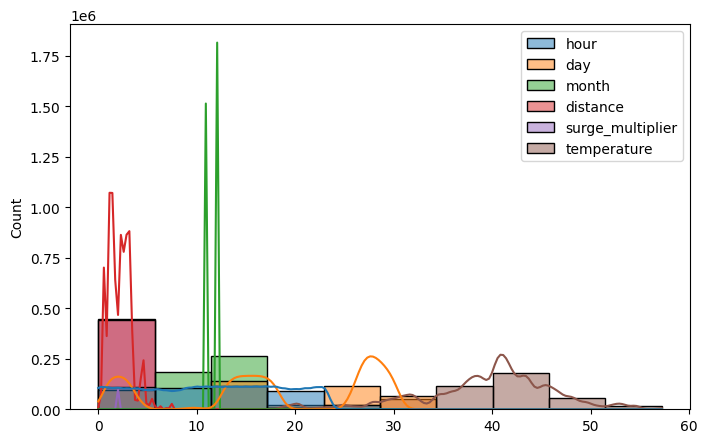

In [ ]:
# melihat penyebaran data numerikal secara keseluruhan
fig, axes = plt.subplots(figsize=(8,5)) #Width, height in inches
sns.histplot(ax=axes,data=X_train[num_columns],kde=True, bins=10)

In [ ]:
# melihat bentuk penyebaran data numerikal
X_train[num_columns].apply(lambda x: round(x.skew(), 3))

hour               -0.045
day                -0.376
month              -0.353
distance            0.818
surge_multiplier    7.992
temperature        -0.611
dtype: float64

- Data yang berhubugan dengan tanggal serta temperature memiliki distribusi yang sedikit negatif, namun tidak akan dilakukan *handling outlier* pada kolom-kolom ini karena dianggap merupakan *outlier* natural. Selain itu, berdasarkan hasil EDA juga menunjukkan bahwa kolom-kolom tersebut tidak begitu berkorelasi dengan harga cab.
- 'distance' memiliki skewness positif, menunjukkan distribusinya miring ke kanan, artinya memiliki ekor yang lebih panjang di sisi kanan dan sebagian besar nilainya terkonsentrasi di sisi kiri.

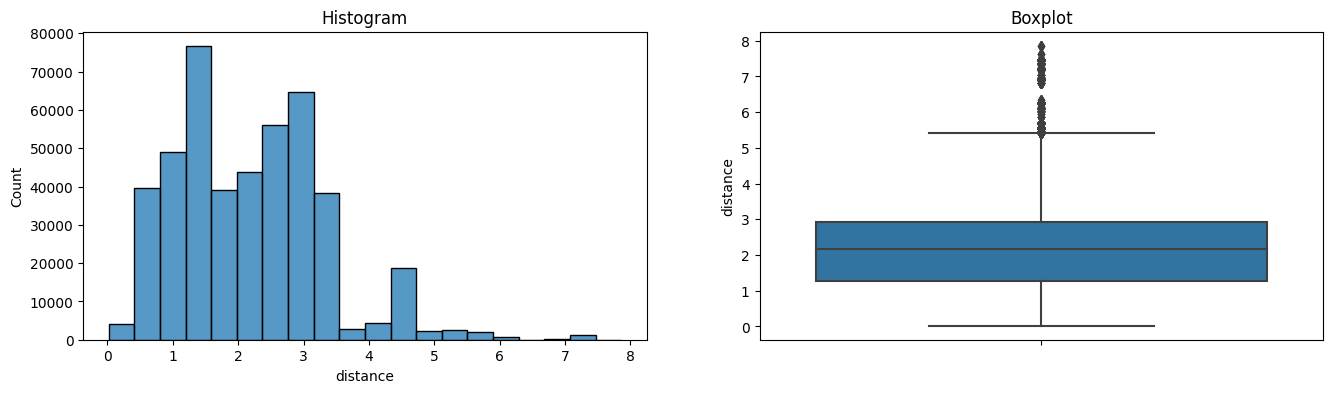

In [59]:
# visualisasi data distance
plt.figure(figsize=(16, 4))

# histogram
plt.subplot(1, 2, 1)
sns.histplot(X_train['distance'], bins=20)
plt.title('Histogram')

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=X_train['distance'])
plt.title('Boxplot')

plt.show()

Karena data merupakan data yang tidak normal, akan dilakukan *handling outlier* menggunakan Tukey's Rule

In [63]:
# mencari batas atas dan bawah
# digunakan perkalian 3 agar data terdeteksi outlier tidak terlalu banyak
upper_boundary = X_train['distance'].mean() + 3 * X_train['distance'].std()
lower_boundary = X_train['distance'].mean() - 3 * X_train['distance'].std()
upper_boundary, lower_boundary

(5.596150144515339, -1.2190303258030273)

In [78]:
# melakukan filtering hanya data tanpa outlier
X_train_no_outlier = X_train[
    ~((X_train['distance'] > upper_boundary) | (X_train['distance'] < lower_boundary))]

*Handling outlier* dilakukan dengan menghapus data *outlier*. Hal ini dikarenakan diinginkan set train yang lebih normal dan bersih, sehingga *handling* dengan cara manipulasi data akan dihindari dulu untuk menghindari resiko model linear menjadi kurang akurat.

In [79]:
# mengecek jumlah baris dengan outlier
X_train.shape[0]

446583

In [80]:
# mengecek jumlah baris tanpa outlier
X_train_no_outlier.shape[0]

443613

In [81]:
# mengambil baris dengan outlier
index_outlier= X_train.query('distance > @upper_boundary').index.tolist()

In [82]:
# menghapus kolom outlier pada y_train juga
y_train_no_outlier= y_train.drop(index_outlier, axis=0)
y_train_no_outlier.shape[0]

443613

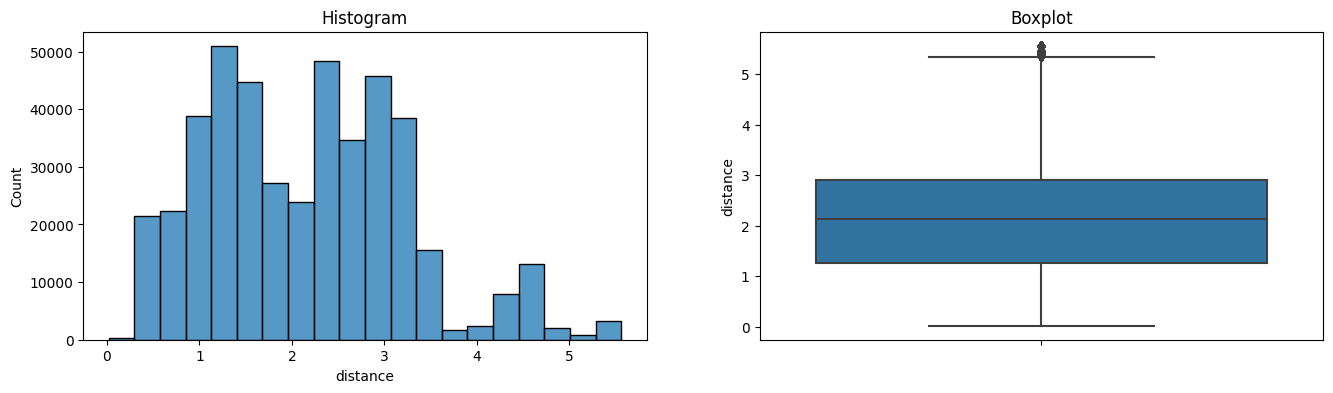

In [111]:
# visualisasi data setelah outlier dihapus
plt.figure(figsize=(16, 4))

# histogram
plt.subplot(1, 2, 1)
sns.histplot(X_train_no_outlier['distance'], bins=20)
plt.title('Histogram')

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=X_train_no_outlier['distance'])
plt.title('Boxplot')

plt.show()

*Outlier* sudah tertangani dengan keterangan hanya kolom *distance* yang dilakukan penanganan, sementara *outliers* pada kolom lainya dianggap sebagai *natural outliers.* Untuk selanjutnya, pre-processing dan transformasi akan dilakukan pada dua set data, yakni dengan dan tanpa *outlier*.

## Scaling, Encoding Data with Outlier


Transformasi data dengan set data yang masih memiliki *outlier*.

### Feature Scaling

In [83]:
# melihat kembali isi set train numerikal
X_train_num

,hour,day,month,distance,surge_multiplier,temperature
0,2,29,11,2.17,1.00,37.92
1,15,27,11,2.52,1.00,40.49
2,6,14,12,1.25,1.25,29.63
3,22,26,11,3.22,1.00,44.93
4,14,28,11,0.99,1.00,39.02
...,...,...,...,...,...,...
446578,10,15,12,3.46,1.00,46.59
446579,22,28,11,2.12,1.00,40.43
446580,2,29,11,1.11,1.00,37.92
446581,17,13,12,0.65,1.00,31.24


Akan dilakukan scaling menggunakan minmaxscaler karena data numerikal tidak terdistribusi normal.

In [85]:
# Menggunakan minmaxscaler
scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[0.08695652, 0.96551724, 0.        , 0.27423469, 0.        ,
        0.49621509],
       [0.65217391, 0.89655172, 0.        , 0.31887755, 0.        ,
        0.5632994 ],
       [0.26086957, 0.44827586, 1.        , 0.15688776, 0.125     ,
        0.2798225 ],
       ...,
       [0.08695652, 0.96551724, 0.        , 0.13903061, 0.        ,
        0.49621509],
       [0.73913043, 0.4137931 , 1.        , 0.08035714, 0.        ,
        0.32184808],
       [0.17391304, 0.4137931 , 1.        , 0.29591837, 0.25      ,
        0.11172018]])

In [87]:
# memasukan ke dalam dataframe 
X_train_scaled = pd.DataFrame(X_train_num_scaled, columns=num_columns)
X_train_scaled

,hour,day,month,distance,surge_multiplier,temperature
0,0.086957,0.965517,0.0,0.274235,0.000,0.496215
1,0.652174,0.896552,0.0,0.318878,0.000,0.563299
2,0.260870,0.448276,1.0,0.156888,0.125,0.279823
3,0.956522,0.862069,0.0,0.408163,0.000,0.679196
4,0.608696,0.931034,0.0,0.123724,0.000,0.524928
...,...,...,...,...,...,...
446578,0.434783,0.482759,1.0,0.438776,0.000,0.722527
446579,0.956522,0.931034,0.0,0.267857,0.000,0.561733
446580,0.086957,0.965517,0.0,0.139031,0.000,0.496215
446581,0.739130,0.413793,1.0,0.080357,0.000,0.321848


### Feature Encoding

In [89]:
# melihat kembali isi set train kategorikal
X_train_cat

,source,destination,cab_type,name,short_summary
0,North Station,South Station,Uber,Luxury,Mostly Cloudy
1,Back Bay,Haymarket Square,Lyft,Luxury,Overcast
2,Financial District,North End,Lyft,Luxury,Mostly Cloudy
3,Fenway,North Station,Lyft,Luxury,Possible Drizzle
4,Haymarket Square,Financial District,Uber,Standard,Partly Cloudy
...,...,...,...,...,...
446578,Boston University,North Station,Lyft,Luxury,Overcast
446579,North Station,South Station,Lyft,Luxury,Overcast
446580,North End,West End,Uber,Standard,Mostly Cloudy
446581,Haymarket Square,West End,Lyft,Shared,Mostly Cloudy


Akan dilakukan encoding dengan keterangan sebagai berikut

cab_type: menggunakan ordinal encoder karena data biner.
 
name: menggunakan ordinal encoder karena data memiliki *ranking*.

In [90]:
# menggunakan ordinal encoder
enc = OrdinalEncoder(categories='auto', #default auto
                     dtype='int', #default float64
                     )

In [97]:
cat_cols_cab=['cab_type', 'source', 'destination','name', 'short_summary']
#variable baru untuk encoding
X_train_encoded= X_train_cat.copy()
X_test_encoded= X_test_cat.copy()

In [100]:
# fit dan transform data train
enc.fit(X_train_encoded[cat_cols_cab])
X_train_encoded[cat_cols_cab] = enc.transform(X_train_encoded[cat_cols_cab])
X_train_encoded.head(2)

,source,destination,cab_type,name,short_summary
0,7,9,1,0,4
1,0,5,0,0,5


In [101]:
# transform data fit
X_test_encoded[cat_cols_cab] = enc.transform(X_test_encoded[cat_cols_cab]) 
X_test_encoded.head(2)

,source,destination,cab_type,name,short_summary
0,4,3,0,2,5
1,11,2,1,3,8


### Concate Numerical Columns and Categorical Columns

In [103]:
#concatenate kedua set yang sudah di scale dan encode
X_train_final = np.concatenate([X_train_num_scaled, X_train_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_encoded], axis=1)
X_train_final

array([[0.08695652, 0.96551724, 0.        , ..., 1.        , 0.        ,
        4.        ],
       [0.65217391, 0.89655172, 0.        , ..., 0.        , 0.        ,
        5.        ],
       [0.26086957, 0.44827586, 1.        , ..., 0.        , 0.        ,
        4.        ],
       ...,
       [0.08695652, 0.96551724, 0.        , ..., 1.        , 3.        ,
        4.        ],
       [0.73913043, 0.4137931 , 1.        , ..., 0.        , 2.        ,
        4.        ],
       [0.17391304, 0.4137931 , 1.        , ..., 0.        , 1.        ,
        0.        ]])

In [104]:
# membuat DataFrame dari data yang sudah digabungkan
X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns + cat_columns])
X_test_final_df = pd.DataFrame(X_test_final, columns=[num_columns + cat_columns])
X_train_final_df

,hour,day,month,distance,surge_multiplier,temperature,source,destination,cab_type,name,short_summary
0,0.086957,0.965517,0.0,0.274235,0.000,0.496215,7.0,9.0,1.0,0.0,4.0
1,0.652174,0.896552,0.0,0.318878,0.000,0.563299,0.0,5.0,0.0,0.0,5.0
2,0.260870,0.448276,1.0,0.156888,0.125,0.279823,4.0,6.0,0.0,0.0,4.0
3,0.956522,0.862069,0.0,0.408163,0.000,0.679196,3.0,7.0,0.0,0.0,7.0
4,0.608696,0.931034,0.0,0.123724,0.000,0.524928,5.0,4.0,1.0,3.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...
446578,0.434783,0.482759,1.0,0.438776,0.000,0.722527,2.0,7.0,0.0,0.0,5.0
446579,0.956522,0.931034,0.0,0.267857,0.000,0.561733,7.0,9.0,0.0,0.0,5.0
446580,0.086957,0.965517,0.0,0.139031,0.000,0.496215,6.0,11.0,1.0,3.0,4.0
446581,0.739130,0.413793,1.0,0.080357,0.000,0.321848,5.0,11.0,0.0,2.0,4.0


## Without outlier

### Split between Numerical Columns and Categorical Columns

In [106]:
# split train set berdasarkan numerik dan kategorikal
# test set akan menggunakan test set yang sama dengan sebelumnya, maka dari itu tidak perlu membuat variabel baru

X_train_no_outlier_num = X_train_no_outlier[num_columns]
X_train_no_outlier_cat = X_train_no_outlier[cat_columns]

X_train_no_outlier_num

,hour,day,month,distance,surge_multiplier,temperature
0,2,29,11,2.17,1.00,37.92
1,15,27,11,2.52,1.00,40.49
2,6,14,12,1.25,1.25,29.63
3,22,26,11,3.22,1.00,44.93
4,14,28,11,0.99,1.00,39.02
...,...,...,...,...,...,...
446578,10,15,12,3.46,1.00,46.59
446579,22,28,11,2.12,1.00,40.43
446580,2,29,11,1.11,1.00,37.92
446581,17,13,12,0.65,1.00,31.24


### Feature Scaling

In [107]:
# menunjukkan isi data numerikal
X_train_no_outlier_num

,hour,day,month,distance,surge_multiplier,temperature
0,2,29,11,2.17,1.00,37.92
1,15,27,11,2.52,1.00,40.49
2,6,14,12,1.25,1.25,29.63
3,22,26,11,3.22,1.00,44.93
4,14,28,11,0.99,1.00,39.02
...,...,...,...,...,...,...
446578,10,15,12,3.46,1.00,46.59
446579,22,28,11,2.12,1.00,40.43
446580,2,29,11,1.11,1.00,37.92
446581,17,13,12,0.65,1.00,31.24


Karena set daat ini telah diatasi *outlier*-nya sebelumnya, maka diasumsikan data sudah mendekati distribusi normal. Oleh karena itu *scaling* akan dibedakan dengan data dengan *outlier*; yakni dengan menggunakan StandardScaler yang dianggap cocok untuk data bersifat normal.

In [108]:
# scaling menggunakan standard scaler
stand_scaler = StandardScaler()
stand_scaler.fit(X_train_no_outlier_num)

X_train_no_outlier_num_scaled = stand_scaler.transform(X_train_no_outlier_num)
X_test_num_scaled = stand_scaler.transform(X_test_num)
X_train_no_outlier_num_scaled

array([[-1.3825193 ,  1.12305121, -1.19231999,  0.01071392, -0.15813087,
        -0.24701841],
       [ 0.48773883,  0.92264004, -1.19231999,  0.33578416, -0.15813087,
         0.13519326],
       [-0.80705526, -0.38003254,  0.83870103, -0.84375643,  2.46337627,
        -1.4799113 ],
       ...,
       [-1.3825193 ,  1.12305121, -1.19231999, -0.97378452, -0.15813087,
        -0.24701841],
       [ 0.77547085, -0.48023813,  0.83870103, -1.4010197 , -0.15813087,
        -1.2404713 ],
       [-1.09478728, -0.48023813,  0.83870103,  0.16860518,  5.08488341,
        -2.43767127]])

In [109]:
# membuat dataframe dari data yang sudah terskala
X_train_no_outlier_scaled = pd.DataFrame(X_train_no_outlier_num_scaled, columns=num_columns)
X_train_no_outlier_scaled

,hour,day,month,distance,surge_multiplier,temperature
0,-1.382519,1.123051,-1.192320,0.010714,-0.158131,-0.247018
1,0.487739,0.922640,-1.192320,0.335784,-0.158131,0.135193
2,-0.807055,-0.380033,0.838701,-0.843756,2.463376,-1.479911
3,1.494801,0.822434,-1.192320,0.985925,-0.158131,0.795512
4,0.343873,1.022846,-1.192320,-1.085237,-0.158131,-0.083426
...,...,...,...,...,...,...
443608,-0.231591,-0.279827,0.838701,1.208830,-0.158131,1.042388
443609,1.494801,1.022846,-1.192320,-0.035725,-0.158131,0.126270
443610,-1.382519,1.123051,-1.192320,-0.973785,-0.158131,-0.247018
443611,0.775471,-0.480238,0.838701,-1.401020,-0.158131,-1.240471


### Feature Encoding

Akan dilakukan encoding dengan keterangan sebagai berikut:

cab_type: menggunakan ordinal *encoder* karena data biner.
 
name: menggunakan ordinal *encoder* karena data memiliki *ranking*.

Pada bagian ini *encoder* menggunakan *encoder* yang telah didefinisikan sebelumnya. Bagian ini juga hanya akan melakukan encoding terhadap data *train*.

In [117]:
#variable baru untuk encoding
X_train_encoded_no= X_train_no_outlier_cat.copy()

In [118]:
# fit dan transform untuk data train
enc.fit(X_train_encoded_no[cat_cols_cab])
X_train_encoded_no[cat_cols_cab] = enc.transform(X_train_encoded_no[cat_cols_cab])
X_train_encoded_no.head(2)

,source,destination,cab_type,name,short_summary
0,7,9,1,0,4
1,0,5,0,0,5


### Concate Numerical Columns and Categorical Columns

In [120]:
# menggabungkan kolom numerikal dan kategorikal
X_train_final_no_outlier = np.concatenate([X_train_no_outlier_scaled, X_train_encoded_no], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_encoded], axis=1)
X_train_final_no_outlier

array([[-1.3825193 ,  1.12305121, -1.19231999, ...,  1.        ,
         0.        ,  4.        ],
       [ 0.48773883,  0.92264004, -1.19231999, ...,  0.        ,
         0.        ,  5.        ],
       [-0.80705526, -0.38003254,  0.83870103, ...,  0.        ,
         0.        ,  4.        ],
       ...,
       [-1.3825193 ,  1.12305121, -1.19231999, ...,  1.        ,
         3.        ,  4.        ],
       [ 0.77547085, -0.48023813,  0.83870103, ...,  0.        ,
         2.        ,  4.        ],
       [-1.09478728, -0.48023813,  0.83870103, ...,  0.        ,
         1.        ,  0.        ]])

In [121]:
# membuat data frame
X_train_final_no_outlier_df = pd.DataFrame(X_train_final_no_outlier, columns=[num_columns + cat_columns])
X_test_final_df = pd.DataFrame(X_test_final, columns=[num_columns + cat_columns])
X_train_final_no_outlier_df

,hour,day,month,distance,surge_multiplier,temperature,source,destination,cab_type,name,short_summary
0,-1.382519,1.123051,-1.192320,0.010714,-0.158131,-0.247018,7.0,9.0,1.0,0.0,4.0
1,0.487739,0.922640,-1.192320,0.335784,-0.158131,0.135193,0.0,5.0,0.0,0.0,5.0
2,-0.807055,-0.380033,0.838701,-0.843756,2.463376,-1.479911,4.0,6.0,0.0,0.0,4.0
3,1.494801,0.822434,-1.192320,0.985925,-0.158131,0.795512,3.0,7.0,0.0,0.0,7.0
4,0.343873,1.022846,-1.192320,-1.085237,-0.158131,-0.083426,5.0,4.0,1.0,3.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...
443608,-0.231591,-0.279827,0.838701,1.208830,-0.158131,1.042388,2.0,7.0,0.0,0.0,5.0
443609,1.494801,1.022846,-1.192320,-0.035725,-0.158131,0.126270,7.0,9.0,0.0,0.0,5.0
443610,-1.382519,1.123051,-1.192320,-0.973785,-0.158131,-0.247018,6.0,11.0,1.0,3.0,4.0
443611,0.775471,-0.480238,0.838701,-1.401020,-0.158131,-1.240471,5.0,11.0,0.0,2.0,4.0


Data sudah siap untuk dilakukan filtering untuk pemilihan fitur terbaik.

## Feature Selection

Akan dilakukan beberapa teknik untuk pemilihan fitur, diantaranya yakni Pearson, VIF, serta ANOVA.

**Pearson**

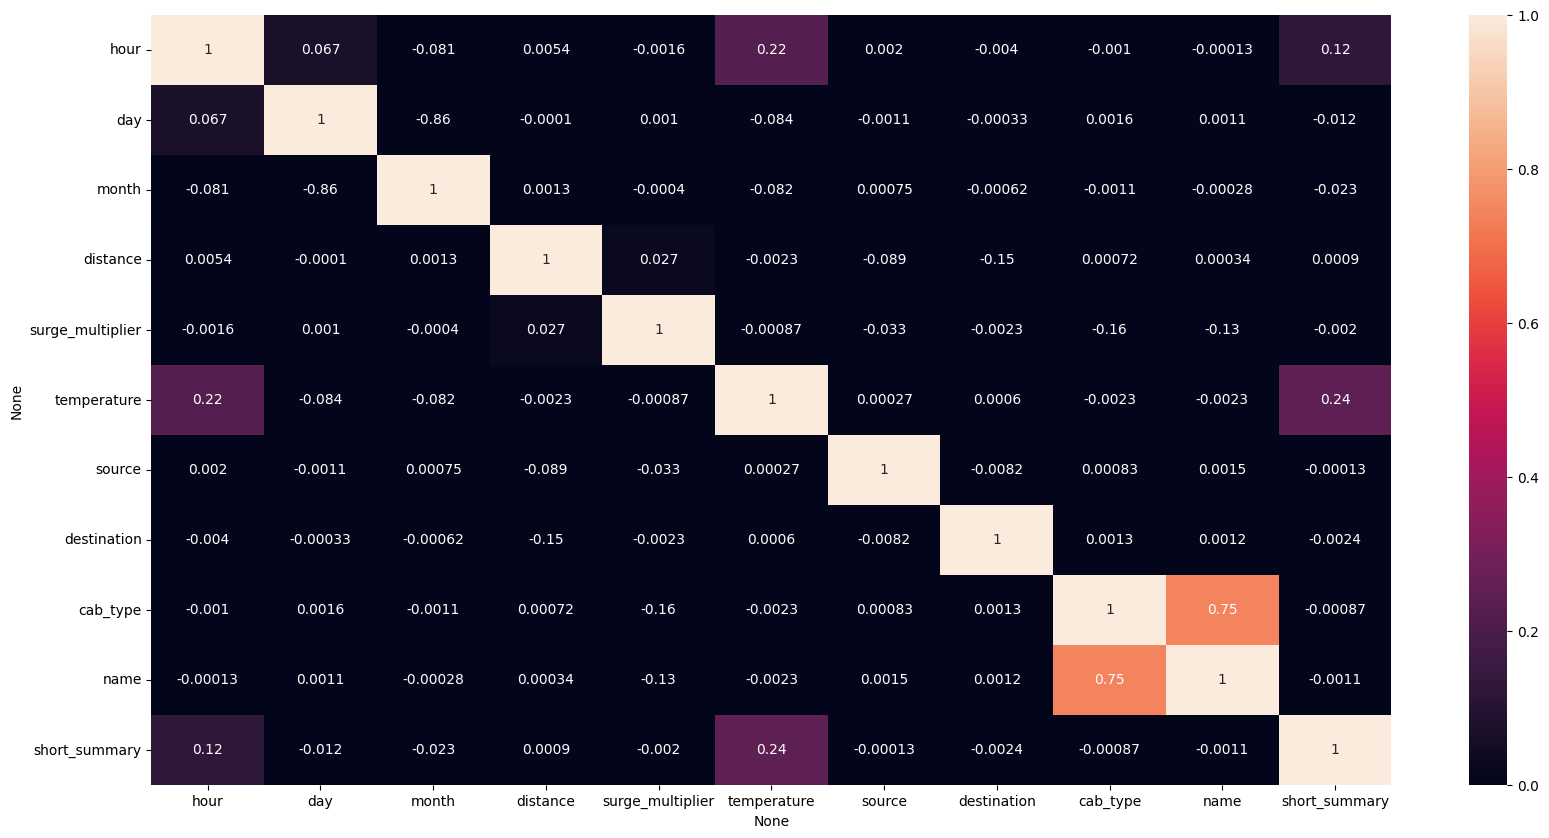

In [ ]:
# setelah encoding
corr_sel = X_train_final_df.corr()

plt.figure(figsize=(20,10))
sns.heatmap(corr_sel, annot= True, vmin=0, vmax=1)
plt.show()

Berdasarkan konklusi dari bagian sebelumnya (EDA) serta visualisasi korelasi dari data yang sudah di-encode, maka akan dilakukan filtering kedua untuk kolom yang dianggap kurang berkorelasi; datetime, hour, day, month,source, destination, short_summary, serta temperature.

**VIF** (Variable Inflation Factors)

In [122]:
# membuat fungsi VIF
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.sort_values(by=['VIF'],ascending=False)
    return(vif)

In [126]:
# kalkulasi vif
calc_vif(X_train_encoded)

,variables,VIF
4,short_summary,3.449748
0,source,2.786572
1,destination,2.782193
2,cab_type,2.699411
3,name,2.673338


Semua fitur tidak ada yang melebihi nilai VIF 5, maka dari itu semua data dapat terpilih. Namun kami hanya akan memilih data kedua terbawah, yakni 'name' dan 'cab_type'.

**ANOVA**

In [131]:
# melakukan pemilihan ANOVA untuk data numerikal
selector = SelectKBest(score_func=f_regression, k=4) #k='all'

selector.fit(X_train_no_outlier_scaled, y_train_no_outlier)
df_scores = pd.DataFrame({'Num Feature': X_train_no_outlier_scaled.columns, 
                          'Score': selector.scores_,
                          'p-value': (selector.pvalues_).round(4)})

# mengurutkan data
df_scores = df_scores.sort_values(by=['Score'], ascending=False)
df_scores

,Feature,Score,p-value
3,distance,57356.721690,0.0000
4,surge_multiplier,27643.982391,0.0000
0,hour,0.558561,0.4548
5,temperature,0.160164,0.6890
1,day,0.089516,0.7648
2,month,0.002216,0.9625


In [132]:
# pemilihan ANOVA untuk data kategorikal
selector = SelectKBest(score_func=f_regression, k=4) #k='all'

selector.fit(X_train_encoded, y_train)
df_scores = pd.DataFrame({'Cat Feature': X_train_encoded.columns, 
                          'Score': selector.scores_,
                          'p-value': (selector.pvalues_).round(4)})

# Tampilkan DataFrame dengan fitur terurut berdasarkan skor ANOVA
df_scores = df_scores.sort_values(by=['Score'], ascending=False)
df_scores

,Cat Feature,Score,p-value
3,name,339591.551748,0.0000
2,cab_type,3096.021983,0.0000
1,destination,979.234200,0.0000
0,source,266.339207,0.0000
4,short_summary,2.310060,0.1285


Dari uji ANOVA didapati bahwa fitur terbaik dari data numerikal adalah 'distance' dan 'surge_multiplier', sementara untuk data kategorikal adalah 'name' dan 'cab_type'. Dengan dukungan argumen dari uji Pearson, VIF, serta ANOVA, maka fitur yang akan dipilih adalah keempat fitur tersebut.

## Final Feature

In [133]:
# mendefinisikan fitur
four_features= ['distance','surge_multiplier','cab_type','name']

In [136]:
# final train untuk data set dengan outlier
X_train_final_w_o= X_train_final_df[four_features]
X_train_final_w_o.head(3)

,distance,surge_multiplier,cab_type,name
0,0.274235,0.000,1.0,0.0
1,0.318878,0.000,0.0,0.0
2,0.156888,0.125,0.0,0.0


In [137]:
# final train untuk data set tanpa outlier
X_train_final_no_o = X_train_final_no_outlier_df[four_features]

In [138]:
# test set final
X_test_final= X_test_final_df[four_features]
X_test_final.head(3)

,distance,surge_multiplier,cab_type,name
0,2.184041,-0.158131,0.0,2.0
1,0.595840,-0.158131,1.0,3.0
2,-0.992360,-0.158131,0.0,1.0


# VI. Model Definition

Seperti yang telah disampaikan pada konklusi EDA, model yang akan digunakan adalah Linear Regression. Asumsi yang dipakai oleh Linear Regression adalah sebagai berikut:

* Linearitas: Hubungan antara variabel independen dan dependen adalah linear.
* Independensi: Tidak ada ketergantungan antara variabel independen.
* Normalitas: Distribusi dari error atau deviasi harus berdistribusi normal.
* Tidak ada multikolinieritas: Tidak ada ketergantungan antara variabel independen (telah dicek dan disaring saat *feature selection*)

In [191]:
model_lin_reg = LinearRegression()
model_lin_reg.fit(X_train_final_no_o,y_train_no_outlier)

LinearRegression()

In [192]:
# mendapatkan nilai intercept dan slope
print('Intercept : ', model_lin_reg.intercept_)
print('Slope     : ', model_lin_reg.coef_)

Intercept :  20.77518638886031
Slope     :  [ 3.06781284  1.8320166   6.7188922  -5.73357489]


*Slope* dan *intercept* merupakan parameter yang diperoleh dari model Linear Regression. Slope atau kemiringan dalam sebuah model linear, menunjukkan seberapa banyak nilai target akan berubah ketika nilai fitur berubah. Dalam kasus ini, terdapat 4 variabel independen sehingga kita memiliki 4 slope yang berbeda. Slope untuk variabel pertama adalah 3.06781284, untuk variabel ke-2 adalah 1.8320166, untuk variabel ke-3 adalah 6.7188922, dan untuk variabel ke-4 adalah -5.73357489.. Sementara *intercept* (y = 20.7) adalah nilai prediksi dari variabel target ketika fitur bernilai nol (x = 0). *Slope* dan *intercept* berguna untuk menghitung nilai prediksi dari variabel dependen berdasarkan nilai variabel independen yang diberikan.

Dari hasil tersebut dapat disimpulkan bahwa ketika nilai fitur pertama (distance) bertambah satu satuan, maka harga argo taksi akan meningkat sebesar 3.067 unit. Hal yang sama berlaku untuk fitur ke-2 (surge_multiplier), ke-3 (cab_type), dan ke-4 (name).

Sumber: [Yale University - Linear Regression](http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm#:~:text=A%20linear%20regression%20line%20has,y%20when%20x%20%3D%200)

#VII. Model Training

### With Outlier


In [140]:
# Train model
model_lin_reg.fit(X_train_final_w_o, y_train)

LinearRegression()

In [141]:
# Predict Train-Set dan Test-Set
y_pred_w_train = model_lin_reg.predict(X_train_final_w_o)
y_pred_w_test = model_lin_reg.predict(X_test_final)
y_pred_w_train

array([27.24583999, 21.50824761, 22.78221871, ...,  7.03005049,
        4.79391731, 24.86782185])

In [143]:
# melihat perbandingan data train dan test dari hasil print
y_pred_w_test

array([ 44.60540493,  10.91351451, -18.93521672, ...,  16.58687278,
         2.40347711, -21.30305566])

Akan dilakukan evaluasi model dengan menggunakan standar error MAE dan RMSE. Hal itu dikarenakan pada dataset training model ini, data belum bersih dari outlier. Maka dari itu MAE dipilih menjadi referensi utama untuk evaluasi model karena sifatnya yang tidak sensitif terhadap outlier. Namun, RMSE juga tetap menjadi pertimbangan karena data target merupakan data harga.

In [153]:
print('TRAIN dengan Outlier')
print('MAE:',mean_absolute_error(y_train,y_pred_w_train))
print('RMSE:',mean_squared_error(y_train,y_pred_w_train,squared=False))

TRAIN dengan Outlier
MAE: 4.035979937216472
RMSE: 5.349746159261999


In [154]:
print('TEST dengan Outlier')
print('MAE:',mean_absolute_error(y_test,y_pred_w_test))
print('RMSE:',mean_squared_error(y_test,y_pred_w_test,squared=False))

TEST dengan Outlier
MAE: 24.12378967935621
RMSE: 43.0175038407315


Terlihat dari jumlah error data train yang lebih sedikit daripada data test, model yang dilatih dengan data *outlier* ternyata memiliki tendensi *overfit*.

### Without Outlier

Akan dilakukan training model dengan data yang telah dibersihkan dari *outlier*.

In [146]:
model_lin_reg = LinearRegression()
model_lin_reg.fit(X_train_final_no_o,y_train_no_outlier)

LinearRegression()

In [147]:
# Predict Train-Set dan Test-Set

y_pred_w_train_no = model_lin_reg.predict(X_train_final_no_o)
y_pred_w_test_no = model_lin_reg.predict(X_test_final)
y_pred_w_train_no

array([27.23724851, 21.51561096, 22.6996458 , ...,  7.01626689,
        4.72027203, 24.87445143])

Akan dilakukan evaluasi model dengan menggunakan standar error RMSE. Hal ini dikarenakan pada model ini, dataset sudah dibersihkan dari outlier sebelumnya, sehingga harapannya data akan cocok bila di evaluasi dengan RMSE yang cocok untuk data harga. Namun, perhitungan MAE tetap akan disertakan sebagai referensi. 

In [152]:
print('TRAIN tanpa Outlier')
print('MAE:',mean_absolute_error(y_train_no_outlier,y_pred_w_train_no))
print('RMSE:',mean_squared_error(y_train_no_outlier,y_pred_w_train_no,squared=False))

TRAIN tanpa Outlier
MAE: 4.027481900923542
RMSE: 5.332961039665763


In [151]:
print('TEST tanpa Outlier')
print('MAE:',mean_absolute_error(y_test,y_pred_w_test_no))
print('RMSE:',mean_squared_error(y_test,y_pred_w_test_no,squared=False))

TEST tanpa Outlier
MAE: 4.032940521061104
RMSE: 5.335694021216129


Dilihat dari nilai error dari data train dan test, ternyata set data yang telah dibersihkan dari *outlier* memberikan performa yang jauh lebih baik dibandingkan data train dengan *outlier*. Evaluasi lebih lanjut akan dijelaskan pada bab selanjutnya. 

# VIII. Model Evaluation

Berdasarkan RMSE dari evaluasi error pada bagian sebelumnya, terdapat perbedaan yang sangat kecil antara model yang dihasilkan dari data train dan data test tanpa outlier. Hal ini menunjukkan bahwa model tersebut memiliki kinerja yang baik pada data yang tidak terlihat pada saat pelatihan (out-of-sample). Oleh karena itu, model tersebut dapat dikatakan sebagai model yang cocok (good fit)

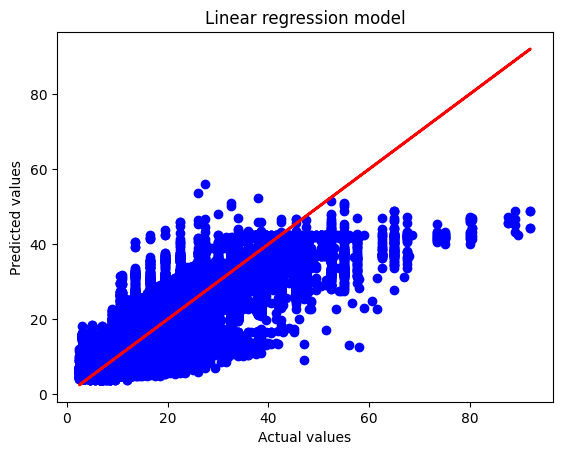

In [162]:
# plotting hasil prediksi
plt.scatter(y_test, y_pred_w_test_no, color='blue')

# menambah garis aktual
plt.plot(y_test, y_test, color='red', linewidth=2)

plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linear regression model')
plt.show()

Walaupun begitu jika kita lihat pada visualisasinya, ternyata masih ada beberapa nilai yang diprediksi jauh dari angka sebenarnya. 

Model memang memiliki kelebihan, yakni dapat membantu pengguna untuk memperkirakan harga perjalanan mereka. Dalam hal bisnis, model ini dapat membantu perusahaan untuk menentukan harga yang tepat untuk setiap perjalanan dan memperkirakan pendapatan yang akan dihasilkan. Dengan menggunakan model ini, perusahaan dapat mengoptimalkan pendapatan dengan memastikan bahwa harga yang mereka kenakan tidak terlalu tinggi atau terlalu rendah.

Namun, kekurangan dari model ini adalah bahwa model hanya menghasilkan prediksi harga berdasarkan data yang tersedia dalam dataset, sehingga model tidak dapat memperhitungkan faktor-faktor lain seperti cuaca atau kepadatan lalu lintas yang dapat memengaruhi harga. Oleh karena itu, hasil prediksi dari model ini mungkin tidak selalu akurat dan pengguna harus menggunakan hasil prediksi sebagai referensi untuk memperkirakan harga perjalanan mereka. Hasil prediksi yang tidak akurat dapat menyebabkan kerugian besar pada domain bisnis. Selain itu, jika data yang digunakan untuk melatih model tidak mewakili variasi yang cukup dalam data yang sebenarnya, maka model dapat mengalami overfitting atau underfitting, yang dapat mengurangi kinerja prediksi model pada data yang tidak terlihat sebelumnya. 


Ada juga hal menarik bahwa *rush hour* sebelumnya dianggap memiliki korelasi terhadap harga, namun ternyata tidak bila dilakukan ranking feature selection. Hal ini dapat diakibatkan salah persepsi atau mungkin bisa jadi fitur memang berhubungan namun ada kesalahan pada encoding serta preparasi data.

# IX. Model Saving
Penyimpanan model serta file terkait untuk digunakan kedepannya.

In [165]:
# karena feature selection dilakukan pada akhir feature engineering (drop dan filtering),
# menyebabkan terjadinya overlap pada pendefinisian beberapa variabel sehingga harus didefinisikan lagi sebelum model disimpan
num_features= ['distance','surge_multiplier']
cat_features= ['cab_type','name']

X_train_num_fin = X_train[num_features]
X_test_num_fin = X_test[num_features]

X_train_cat_fin = X_train[cat_features]
X_test_cat_fin = X_test[cat_features]

In [166]:
# pendefinisian ulang stand_scaler dengan selected features
stand_scaler.fit(X_train_num_fin)
X_train_num_finn = stand_scaler.transform(X_train_num_fin)
X_test_num_finn = stand_scaler.transform(X_train_num_fin)

In [167]:
# pendefinisian ulang encoder dengan selected features
enc.fit(X_train_cat_fin[cat_features])
X_train_cat_fin[cat_features] = enc.transform(X_train_cat_fin[cat_features])
X_test_cat_fin[cat_features] = enc.transform(X_test_cat_fin[cat_features])

<ipython-input-167-5c6f20926fec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat_fin[cat_features] = enc.transform(X_train_cat_fin[cat_features])
<ipython-input-167-5c6f20926fec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat_fin[cat_features] = enc.transform(X_test_cat_fin[cat_features])


In [188]:
# menyimpan model
with open('model_lin_reg.pkl', 'wb') as file_1:
  pickle.dump(model_lin_reg, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  pickle.dump(scaler, file_2)

with open('model_encoder.pkl', 'wb') as file_3:
  pickle.dump(enc, file_3)

with open('list_num_cols.txt', 'w') as file_4:
  json.dump(num_features, file_4)

with open('list_cat_cols.txt','w') as file_5: 
  json.dump(cat_features, file_5)

Model akan diuji coba dengan data *inference* pada file terpisah.

# IX. Analysis and Conclusion

**Analysis**

Melihat deskripsi serta perbandingan prediksi model dari data train.

In [172]:
# membuat dataframe hasil prediksi dan aktual
model_result = pd.DataFrame({
    'actual':y_train_no_outlier,
    'pred':y_pred_w_train_no
})

In [173]:
#membuat kolom baru yang merupakan selisih
model_result['difference'] = model_result['pred'] - model_result['actual']
model_result.describe()

,actual,pred,difference
count,443613.000000,443613.000000,4.436130e+05
mean,16.475766,16.475766,-1.429181e-15
std,9.256884,7.566331,5.332967e+00
min,2.500000,3.910531,-5.958105e+01
25%,9.000000,10.463919,-2.775906e+00
50%,13.500000,15.804045,5.548884e-01
75%,22.500000,22.621384,3.567819e+00
max,97.500000,60.243707,2.976567e+01


In [175]:
#melihat jumlah selisih
model_result['difference'].sum()

-6.340030722640222e-10

Jumlah selisih merupakan minus yang berarti model cenderung memprediksi harga lebih rendah daripada nilai aktual. Hal ini kemudian akan mengakibatkan kerugian apabila model digunakan untuk *business purpose*.

In [184]:
# mengurutkan model dan melihat lokasi selisih tertinggi
model_result.sort_values(by='difference', ascending=False)

,actual,pred,difference
203553,22.5,52.265669,29.765669
222687,26.0,53.576347,27.576347
361023,13.5,40.580392,27.080392
195209,13.5,40.494913,26.994913
300025,13.5,40.437927,26.937927
...,...,...,...
387121,80.5,30.656407,-49.843593
414186,87.0,36.896372,-50.103628
210546,97.5,46.168350,-51.331650
353697,68.5,13.598148,-54.901852


Melihat deskripsi serta perbandingan prediksi model dari data test.

In [179]:
# Membuat dataframe yang merupakan perbandingan aktual dengan harga prediksi
test_result = pd.DataFrame({
    'actual':y_test,
    'pred':y_pred_w_test_no
})
test_result

,actual,pred
0,7.0,15.718566
1,10.5,11.831582
2,7.0,11.707538
3,15.5,23.675625
4,16.5,17.526592
...,...,...
191388,12.5,16.390461
191389,22.5,20.917258
191390,19.5,12.629386
191391,10.0,10.634877


In [180]:
# membuat kolom selirih serta melihat deskripsi
test_result['difference'] = test_result['pred'] - test_result['actual']
test_result.describe()

,actual,pred,difference
count,191393.000000,191393.000000,191393.000000
mean,16.559637,16.568386,0.008749
std,9.340136,7.643964,5.335701
min,2.500000,3.910531,-47.769173
25%,9.000000,10.463919,-2.770988
50%,13.500000,15.902492,0.565074
75%,22.500000,22.655331,3.582725
max,92.000000,56.026744,28.526744


In [181]:
# menjumlahkan untuk melihat tendensi model, over predict atau under predict
test_result['difference'].sum()

1674.4377848903505

Berbeda dengan training, data test justru memiliki tendensi *over predict.*

In [182]:
# mengurutkan berdasarkan selisih
test_result.sort_values(by='difference', ascending=False)

,actual,pred,difference
55717,27.5,56.026744,28.526744
57688,26.0,53.661826,27.661826
116820,13.5,40.580392,27.080392
170678,13.5,40.437927,26.937927
67363,16.5,42.318464,25.818464
...,...,...,...
23557,58.0,12.600893,-45.399107
89701,89.0,43.303229,-45.696771
21583,89.5,42.310040,-47.189960
164084,92.0,44.230827,-47.769173


In [186]:
# melihat fitur asli pada kolom dengan selisih terbesar ($-59.5)
X_train.loc[240560]

hour                                 17
day                                  26
month                                11
datetime            2018-11-26 17:53:09
source                           Fenway
destination          Financial District
cab_type                           Uber
name                           Standard
distance                           4.41
surge_multiplier                    1.0
short_summary                 Overcast 
temperature                       45.83
Name: 240560, dtype: object

In [187]:
# melihat fitur asli pada kolom dengan selisih terbesar ($-47.7)
X_test.loc[64993]

hour                                 17
day                                  27
month                                11
datetime            2018-11-27 17:03:22
source                Boston University
destination          Financial District
cab_type                           Lyft
name                             Luxury
distance                           3.75
surge_multiplier                    2.0
short_summary                 Overcast 
temperature                       41.34
Name: 64993, dtype: object

Kedua baris di atas memiliki prediksi dengan *difference*/ error terbesar. Pada kedua set train dan test yang memiliki error tinggi tersebut, jika melihat dari empat kolom yang telah terseleksi, tidak ada kolom yang memiliki kesamaan. Asumsi kami adalah bahwa ada kesalahan metode yang kurang tepat pada saat melakukan encoding data kategorikal. Bisa jadi machine menganggap data nominal data yang memiliki *ranking*, atau sebaliknya, data yang harusnya memiliki ranking justru tidak terbaca dengan baik, sehingga menyebabkan prediksi 'price' yang melenceng. 
Secara garis besar, hasil prediksi train dianggap memiliki tendensi untuk *under predict*, sementara hasil prediksi test dianggap memiliki tendensi *over predict*. Sementara itu, keduanya memiliki nilai selisih terbesar disaat prediksi merupakan nilai minus atau *under predict* (rugi).

**Conclusion**

Pada proyek ini, kami telah membuat model *machine learning* untuk memprediksi harga tarif cab dengan tujuan untuk mendukung perkembangan transportasi berbasis aplikasi. Berikut adalah kesimpulan serta analisis dari proyek ini:

1. Eksplorasi data: Data yang digunakan memiliki kolom yang cukup banyak, diantaranya ada yang berkaitan dengan waktu, jarak, tipe cab, hingga cuaca. Telah dilakukan filtering pertama berdasarkan hasil EDA, yakni untuk kolom-kolom yang dianggap masih memiliki korelasi dengan target. Hal-hal tersebut ditandai dengan perbedaan harga yang dimiliki oleh tipe cab serta nama cab yang berbeda (ada yang hemal seperti Uber Pool, ada juga yang menyediakan versi Luxury, dan sebagainya). Secara garis besar, Uber memiliki harga yang lebih murah dibandingkan Lyft. Selain itu, ditemukan juga adanya rush hour pada sekitar jam makan siang dan tengah malam. Namun fitur tersebut ('hour') belum tentu berkorelasi dengan harga yang ingin diprediksi. Selain itu, filtering pertama yang dilakukan menyebabkan data kehilangan beberapa fitur yang bisa jadi hal yang menarik untuk analisis selanjutnya. 

2. Model Evaluation: Berdasarkan RMSE yang diberikan, terdapat perbedaan yang sangat kecil antara model yang dihasilkan dari data train dan data test tanpa outlier. Hal ini menunjukkan bahwa model tersebut memiliki kinerja yang cukup baik (good fit). 

3. Model Analysis: Model memiliki kelebihan yang dapat membantu perusahaan cabuntuk menentukan harga yang tepat untuk setiap perjalanan dan memperkirakan pendapatan yang akan dihasilkan. Namun, model juga memiliki kekurangan bahwa model memiliki tendensi untuk *under predict*, dimana hal tersebut dapat memberikan kerugian pada perusahaan cab.



4. Further Improvement: Model dapat mencoba menggunakan fitur-fitur lain yang telah tersedia. Selain itu, ada beberapa asumsi yang salah/ tidak ditemukan korelasinya lagi setelah dilakukan proses Feature Engineering, seperti contohnya 'rush hour' yang sebelumnya telah diteliti pada bagian EDA. Hal ini mungkin dapat diakibatkan oleh kesalahan teknik pada saat transformasi dan sebagainya.
Selain itu, ada pula pertimbangan dalam mengelompokkan data, seperti kolom 'surge_multiplier' yang bisa bersifat kategorikal maupun numerikal. Khusus pada model ini, kolom tersebut dianggap sebagai numerikal. Namun, bisa jadi akan ada perbedaan pada model apabila kolom tersebut diperlakukan seperti kolom kategori. 